In [1]:
import datetime
import os

import numpy as np
import xarray as xr

from opendrift.readers import reader_netCDF_CF_generic
from opendrift.models import oceandrift

In [2]:
import opendrift
opendrift.__version__

'1.10.7'

In [3]:
data_dir='/home/soontiensn/data/gpsc-jeh326/projects/stokes_drift/input_data/SalishSea/currents/'

In [4]:
reader = reader_netCDF_CF_generic.Reader(os.path.join(data_dir, '*.nc'))

In [5]:
reader

Reader: /home/soontiensn/data/gpsc-jeh326/projects/stokes_drift/input_data/SalishSea/currents/*.nc
Projection: 
  +proj=latlong
Coverage: [degrees]
  xmin: 234.000000   xmax: 237.996994   step: 0.00700378   numx: 571
  ymin: 48.000000   ymax: 50.970001   step: 0.00450134   numy: 660
  Corners (lon, lat):
    (234.00,  50.97)  (238.00,  50.97)
    (234.00,  48.00)  (238.00,  48.00)
Vertical levels [m]: 
  Not specified
Available time range:
  start: 2023-02-17 00:00:00   end: 2023-02-24 11:30:00   step: 0:30:00
    360 times (0 missing)
Variables:
  eastward_sea_water_velocity
  northward_sea_water_velocity
  x_sea_water_velocity
  y_sea_water_velocity

# Lons -180 to 180

In [6]:
lon_min=-124
lon_max=-122.5
lat_min=48
lat_max=50

lons = np.linspace(lon_min, lon_max, num=15)
lats = np.linspace(lat_min, lat_max, num=15)

lons, lats = np.meshgrid(lons, lats)

o = oceandrift.OceanDrift()
o.add_reader(reader)
o.seed_elements(lon=lons, lat=lats, time = reader.start_time)

o.run(end_time=datetime.datetime(2023,2,19),outfile='lons180-newopendrift.nc')

11:47:34 DEBUG   opendrift.models.basemodel:625: Adding 18 config items from basemodel
11:47:34 DEBUG   opendrift.models.basemodel:625: Adding 5 config items from basemodel
11:47:34 DEBUG   opendrift.models.basemodel:625: Adding 36 config items from basemodel
11:47:34 INFO    opendrift.models.basemodel:539: OpenDriftSimulation initialised (version 1.10.7 / v1.4.2-1580-gfab10c8)
11:47:34 DEBUG   opendrift.models.basemodel:625: Adding 14 config items from oceandrift
11:47:34 DEBUG   opendrift.models.basemodel:637:   Overwriting config item seed:z
11:47:34 DEBUG   opendrift.readers.basereader.variables:548: Setting buffer size 5 for reader /home/soontiensn/data/gpsc-jeh326/projects/stokes_drift/input_data/SalishSea/currents/*.nc, assuming a maximum average speed of 1 m/s and time span of 0:30:00
11:47:34 DEBUG   opendrift.models.basemodel:952: Added reader /home/soontiensn/data/gpsc-jeh326/projects/stokes_drift/input_data/SalishSea/currents/*.nc
11:47:34 DEBUG   opendrift.models.basemodel

11:47:38 DEBUG   opendrift.models.basemodel:1232: ----------------------------------------
11:47:38 DEBUG   opendrift.models.basemodel:1236: Calling reader /home/soontiensn/data/gpsc-jeh326/projects/stokes_drift/input_data/SalishSea/currents/*.nc
11:47:38 DEBUG   opendrift.models.basemodel:1237: ----------------------------------------
11:47:38 DEBUG   opendrift.models.basemodel:1253: Data needed for 225 elements
11:47:38 DEBUG   opendrift.readers.basereader.variables:692: Fetching variables from /home/soontiensn/data/gpsc-jeh326/projects/stokes_drift/input_data/SalishSea/currents/*.nc
11:47:38 DEBUG   opendrift.readers.basereader.structured:178: Modulating longitudes to 0-360 for self.name
11:47:38 DEBUG   opendrift.readers.basereader.structured:184: Reader time:
		2023-02-17 00:00:00 (before)
		2023-02-17 00:30:00 (after)
11:47:38 DEBUG   opendrift.readers.reader_netCDF_CF_generic:380: Using eastward_sea_water_velocity to retrieve x_sea_water_velocity
11:47:38 DEBUG   opendrift.reade

11:47:38 DEBUG   opendrift.models.basemodel:1526: ---------------------------------
11:47:38 DEBUG   opendrift.models.basemodel:1527: 		225 active elements
11:47:38 DEBUG   opendrift.models.basemodel:1538: 		47.98 <- latitude  -> 50.09
11:47:38 DEBUG   opendrift.models.basemodel:1543: 		-124.06 <- longitude -> -122.5
11:47:38 DEBUG   opendrift.models.basemodel:1546: 		z = 0.0
11:47:38 DEBUG   opendrift.models.basemodel:1549: ---------------------------------
11:47:38 DEBUG   opendrift.models.physics_methods:868: Calculating Hs from wind, min: 0.000000, mean: 0.000000, max: 0.000000
11:47:38 DEBUG   opendrift.models.physics_methods:926: Calculating wave period Tm02 from wind
11:47:38 DEBUG   opendrift.models.physics_methods:936:    min: 1.256637, mean: 1.256637, max: 1.256637
11:47:38 DEBUG   opendrift.models.physics_methods:876: Calculating wave period from wind, min: 1.256637, mean: 1.256637, max: 1.256637
11:47:38 DEBUG   opendrift.models.basemodel:2466: No elements to deactivate
11:

11:47:38 DEBUG   opendrift.models.basemodel:1414: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
11:47:38 DEBUG   opendrift.models.basemodel:1421:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
11:47:38 DEBUG   opendrift.models.basemodel:1522: ------------ SUMMARY -------------
11:47:38 DEBUG   opendrift.models.basemodel:1524:     x_sea_water_velocity: -1.75997 (min) 0.758168 (max)
11:47:38 DEBUG   opendrift.models.basemodel:1524:     y_sea_water_velocity: -1.24889 (min) 1.79226 (max)
11:47:38 DEBUG   opendrift.models.basemodel:1524:     x_wind: 0 (min) 0 (max)
11:47:38 DEBUG   opendrift.models.basemodel:1524:     y_wind: 0 (min) 0 (max)
11:47:38 DEBUG   opendrift.models.basemodel:1524:     upward_sea_water_velocity: 0 (min) 0 (max)
11:47:38 DEBUG   opendrift.models.basemodel:1524:     ocean_vertical_diffusivity: 0 (min) 0 (max)
11:47:38 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_signifi

11:47:38 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 105 elements, expanding data 2
11:47:38 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 87 elements, expanding data 3
11:47:38 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 77 elements, expanding data 4
11:47:38 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 55 elements, expanding data 5
11:47:38 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 52 elements, expanding data 6
11:47:38 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 39 elements, expanding data 7
11:47:38 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 35 elements, expanding data 8
11:47:38 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 32 elements, expanding data 9
11:47:38 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 32 elements,

11:47:39 DEBUG   opendrift.models.basemodel:1237: ----------------------------------------
11:47:39 DEBUG   opendrift.models.basemodel:1253: Data needed for 189 elements
11:47:39 DEBUG   opendrift.readers.basereader.variables:692: Fetching variables from /home/soontiensn/data/gpsc-jeh326/projects/stokes_drift/input_data/SalishSea/currents/*.nc
11:47:39 DEBUG   opendrift.readers.basereader.structured:178: Modulating longitudes to 0-360 for self.name
11:47:39 DEBUG   opendrift.readers.basereader.structured:184: Reader time:
		2023-02-17 03:00:00 (before)
		2023-02-17 03:30:00 (after)
11:47:39 DEBUG   opendrift.readers.reader_netCDF_CF_generic:380: Using eastward_sea_water_velocity to retrieve x_sea_water_velocity
11:47:39 DEBUG   opendrift.readers.reader_netCDF_CF_generic:380: Using northward_sea_water_velocity to retrieve y_sea_water_velocity
11:47:39 DEBUG   opendrift.readers.reader_netCDF_CF_generic:464: North is up, no rotation necessary
11:47:39 DEBUG   opendrift.readers.basereader.

11:47:39 DEBUG   opendrift.models.basemodel:1543: 		-124.12840603272605 <- longitude -> -122.5
11:47:39 DEBUG   opendrift.models.basemodel:1546: 		z = 0.0
11:47:39 DEBUG   opendrift.models.basemodel:1549: ---------------------------------
11:47:39 DEBUG   opendrift.models.physics_methods:868: Calculating Hs from wind, min: 0.000000, mean: 0.000000, max: 0.000000
11:47:39 DEBUG   opendrift.models.physics_methods:926: Calculating wave period Tm02 from wind
11:47:39 DEBUG   opendrift.models.physics_methods:936:    min: 1.256637, mean: 1.256637, max: 1.256637
11:47:39 DEBUG   opendrift.models.physics_methods:876: Calculating wave period from wind, min: 1.256637, mean: 1.256637, max: 1.256637
11:47:39 DEBUG   opendrift.models.basemodel:2450: 4 elements scheduled for deactivation (stranded)
11:47:39 DEBUG   opendrift.models.basemodel:2452: 	(z: 0.000000 to 0.000000)
11:47:39 DEBUG   opendrift.models.basemodel:2470: Removed 4 elements.
11:47:39 DEBUG   opendrift.models.basemodel:2473: Removed

11:47:39 DEBUG   opendrift.models.basemodel:1397: ---------------------------------------
11:47:39 DEBUG   opendrift.models.basemodel:1398: Finished processing all variable groups
11:47:39 DEBUG   opendrift.models.basemodel:1407:     Using fallback value 0 for x_sea_water_velocity for 32 elements
11:47:39 DEBUG   opendrift.models.basemodel:1407:     Using fallback value 0 for y_sea_water_velocity for 32 elements
11:47:39 DEBUG   opendrift.models.basemodel:1414: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
11:47:39 DEBUG   opendrift.models.basemodel:1421:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
11:47:39 DEBUG   opendrift.models.basemodel:1522: ------------ SUMMARY -------------
11:47:39 DEBUG   opendrift.models.basemodel:1524:     x_sea_water_velocity: -0.846594 (min) 0.574429 (max)
11:47:39 DEBUG   opendrift.models.basemodel:1524:     y_sea_water_velocity: -0.56403 (min) 0.587961 (max)
11:47:39 DE

11:47:39 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 31 elements, expanding data 10
11:47:39 WARNING opendrift:133: Still NaN-values after 10 iterations, exiting!
11:47:39 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 101 elements, expanding data 1
11:47:39 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 78 elements, expanding data 2
11:47:39 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 53 elements, expanding data 3
11:47:39 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 45 elements, expanding data 4
11:47:39 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 35 elements, expanding data 5
11:47:39 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 35 elements, expanding data 6
11:47:39 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 35 elements, expanding data 7
11:47:39 DEBUG 

11:47:39 DEBUG   opendrift.models.basemodel:1231: Variable group ['x_sea_water_velocity', 'y_sea_water_velocity']
11:47:39 DEBUG   opendrift.models.basemodel:1232: ----------------------------------------
11:47:39 DEBUG   opendrift.models.basemodel:1236: Calling reader /home/soontiensn/data/gpsc-jeh326/projects/stokes_drift/input_data/SalishSea/currents/*.nc
11:47:39 DEBUG   opendrift.models.basemodel:1237: ----------------------------------------
11:47:39 DEBUG   opendrift.models.basemodel:1253: Data needed for 166 elements
11:47:39 DEBUG   opendrift.readers.basereader.variables:692: Fetching variables from /home/soontiensn/data/gpsc-jeh326/projects/stokes_drift/input_data/SalishSea/currents/*.nc
11:47:39 DEBUG   opendrift.readers.basereader.structured:178: Modulating longitudes to 0-360 for self.name
11:47:39 DEBUG   opendrift.readers.basereader.structured:184: Reader time:
		2023-02-17 06:00:00 (before)
		2023-02-17 06:30:00 (after)
11:47:39 DEBUG   opendrift.readers.reader_netCDF_C

11:47:39 DEBUG   opendrift.models.basemodel:1524:     land_binary_mask: 0 (min) 1 (max)
11:47:39 DEBUG   opendrift.models.basemodel:1526: ---------------------------------
11:47:39 DEBUG   opendrift.models.basemodel:1527: 		166 active elements
11:47:39 DEBUG   opendrift.models.basemodel:1538: 		47.979999542236335 <- latitude  -> 50.09000015258789
11:47:39 DEBUG   opendrift.models.basemodel:1543: 		-124.14055981872882 <- longitude -> -122.5
11:47:39 DEBUG   opendrift.models.basemodel:1546: 		z = 0.0
11:47:39 DEBUG   opendrift.models.basemodel:1549: ---------------------------------
11:47:39 DEBUG   opendrift.models.physics_methods:868: Calculating Hs from wind, min: 0.000000, mean: 0.000000, max: 0.000000
11:47:39 DEBUG   opendrift.models.physics_methods:926: Calculating wave period Tm02 from wind
11:47:39 DEBUG   opendrift.models.physics_methods:936:    min: 1.256637, mean: 1.256637, max: 1.256637
11:47:39 DEBUG   opendrift.models.physics_methods:876: Calculating wave period from wind,

11:47:39 DEBUG   opendrift.readers.basereader.variables:573: Checking land_binary_mask for invalid values
11:47:39 DEBUG   opendrift.readers.basereader.variables:728: Reader projection is latlon - rotation of vectors is not needed.
11:47:39 DEBUG   opendrift.models.basemodel:1384: Obtained data for all elements.
11:47:39 DEBUG   opendrift.models.basemodel:1397: ---------------------------------------
11:47:39 DEBUG   opendrift.models.basemodel:1398: Finished processing all variable groups
11:47:39 DEBUG   opendrift.models.basemodel:1407:     Using fallback value 0 for x_sea_water_velocity for 32 elements
11:47:39 DEBUG   opendrift.models.basemodel:1407:     Using fallback value 0 for y_sea_water_velocity for 32 elements
11:47:39 DEBUG   opendrift.models.basemodel:1414: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
11:47:39 DEBUG   opendrift.models.basemodel:1421:       Using fallback value 0 for ocean_vertical_diffusivity for all prof

11:47:39 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 35 elements, expanding data 7
11:47:39 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 34 elements, expanding data 8
11:47:39 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 31 elements, expanding data 9
11:47:39 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 31 elements, expanding data 10
11:47:39 WARNING opendrift:133: Still NaN-values after 10 iterations, exiting!
11:47:39 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 86 elements, expanding data 1
11:47:39 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 56 elements, expanding data 2
11:47:39 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 50 elements, expanding data 3
11:47:39 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 39 elements, expanding data 4
11:47:39 DEBUG  

11:47:39 DEBUG   opendrift.models.basemodel:2888: 0 elements scheduled.
11:47:39 DEBUG   opendrift.models.basemodel:2890: ======================================================================
11:47:39 DEBUG   opendrift.models.basemodel:1230: ----------------------------------------
11:47:39 DEBUG   opendrift.models.basemodel:1231: Variable group ['x_sea_water_velocity', 'y_sea_water_velocity']
11:47:39 DEBUG   opendrift.models.basemodel:1232: ----------------------------------------
11:47:39 DEBUG   opendrift.models.basemodel:1236: Calling reader /home/soontiensn/data/gpsc-jeh326/projects/stokes_drift/input_data/SalishSea/currents/*.nc
11:47:39 DEBUG   opendrift.models.basemodel:1237: ----------------------------------------
11:47:39 DEBUG   opendrift.models.basemodel:1253: Data needed for 154 elements
11:47:39 DEBUG   opendrift.readers.basereader.variables:692: Fetching variables from /home/soontiensn/data/gpsc-jeh326/projects/stokes_drift/input_data/SalishSea/currents/*.nc
11:47:39 

11:47:39 DEBUG   opendrift.models.basemodel:1524:     turbulent_generic_length_scale: 0 (min) 0 (max)
11:47:39 DEBUG   opendrift.models.basemodel:1524:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
11:47:39 DEBUG   opendrift.models.basemodel:1524:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
11:47:39 DEBUG   opendrift.models.basemodel:1524:     land_binary_mask: 0 (min) 1 (max)
11:47:39 DEBUG   opendrift.models.basemodel:1526: ---------------------------------
11:47:39 DEBUG   opendrift.models.basemodel:1527: 		154 active elements
11:47:39 DEBUG   opendrift.models.basemodel:1538: 		47.979999542236335 <- latitude  -> 50.09000015258789
11:47:39 DEBUG   opendrift.models.basemodel:1543: 		-124.06452519911716 <- longitude -> -122.5
11:47:39 DEBUG   opendrift.models.basemodel:1546: 		z = 0.0
11:47:39 DEBUG   opendrift.models.basemodel:1549: ---------------------------------
11:47:39 DEBUG   opendrift.models.physics_methods:868: Calculating Hs from wind, min: 0.000000, me

11:47:40 DEBUG   opendrift.models.basemodel:1237: ----------------------------------------
11:47:40 DEBUG   opendrift.models.basemodel:1253: Data needed for 149 elements
11:47:40 DEBUG   opendrift.readers.basereader.variables:692: Fetching variables from global_landmask
11:47:40 DEBUG   opendrift.readers.basereader.continuous:37: Fetched env-before
11:47:40 DEBUG   opendrift.readers.basereader.variables:573: Checking land_binary_mask for invalid values
11:47:40 DEBUG   opendrift.readers.basereader.variables:728: Reader projection is latlon - rotation of vectors is not needed.
11:47:40 DEBUG   opendrift.models.basemodel:1384: Obtained data for all elements.
11:47:40 DEBUG   opendrift.models.basemodel:1397: ---------------------------------------
11:47:40 DEBUG   opendrift.models.basemodel:1398: Finished processing all variable groups
11:47:40 DEBUG   opendrift.models.basemodel:1407:     Using fallback value 0 for x_sea_water_velocity for 32 elements
11:47:40 DEBUG   opendrift.models.bas

11:47:40 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 38 elements, expanding data 4
11:47:40 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 37 elements, expanding data 5
11:47:40 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 36 elements, expanding data 6
11:47:40 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 36 elements, expanding data 7
11:47:40 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 34 elements, expanding data 8
11:47:40 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 31 elements, expanding data 9
11:47:40 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 31 elements, expanding data 10
11:47:40 WARNING opendrift:133: Still NaN-values after 10 iterations, exiting!
11:47:40 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 81 elements, expanding data 1
11:47:40 DEBUG  

11:47:40 DEBUG   opendrift.models.basemodel:1658: to be seeded: 0, already seeded 225
11:47:40 DEBUG   opendrift.models.basemodel:2881: ======================================================================
11:47:40 INFO    opendrift.models.basemodel:2882: 2023-02-17 12:00:00 - step 13 of 48 - 138 active elements (87 deactivated)
11:47:40 DEBUG   opendrift.models.basemodel:2888: 0 elements scheduled.
11:47:40 DEBUG   opendrift.models.basemodel:2890: ======================================================================
11:47:40 DEBUG   opendrift.models.basemodel:1230: ----------------------------------------
11:47:40 DEBUG   opendrift.models.basemodel:1231: Variable group ['x_sea_water_velocity', 'y_sea_water_velocity']
11:47:40 DEBUG   opendrift.models.basemodel:1232: ----------------------------------------
11:47:40 DEBUG   opendrift.models.basemodel:1236: Calling reader /home/soontiensn/data/gpsc-jeh326/projects/stokes_drift/input_data/SalishSea/currents/*.nc
11:47:40 DEBUG   opendr

11:47:40 DEBUG   opendrift.models.basemodel:1524:     surface_downward_x_stress: 0 (min) 0 (max)
11:47:40 DEBUG   opendrift.models.basemodel:1524:     surface_downward_y_stress: 0 (min) 0 (max)
11:47:40 DEBUG   opendrift.models.basemodel:1524:     turbulent_kinetic_energy: 0 (min) 0 (max)
11:47:40 DEBUG   opendrift.models.basemodel:1524:     turbulent_generic_length_scale: 0 (min) 0 (max)
11:47:40 DEBUG   opendrift.models.basemodel:1524:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
11:47:40 DEBUG   opendrift.models.basemodel:1524:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
11:47:40 DEBUG   opendrift.models.basemodel:1524:     land_binary_mask: 0 (min) 1 (max)
11:47:40 DEBUG   opendrift.models.basemodel:1526: ---------------------------------
11:47:40 DEBUG   opendrift.models.basemodel:1527: 		138 active elements
11:47:40 DEBUG   opendrift.models.basemodel:1538: 		47.979999542236335 <- latitude  -> 50.09000015258789
11:47:40 DEBUG   opendrift.models.basemodel:154

11:47:40 DEBUG   opendrift.models.basemodel:1231: Variable group ['land_binary_mask']
11:47:40 DEBUG   opendrift.models.basemodel:1232: ----------------------------------------
11:47:40 DEBUG   opendrift.models.basemodel:1236: Calling reader global_landmask
11:47:40 DEBUG   opendrift.models.basemodel:1237: ----------------------------------------
11:47:40 DEBUG   opendrift.models.basemodel:1253: Data needed for 136 elements
11:47:40 DEBUG   opendrift.readers.basereader.variables:692: Fetching variables from global_landmask
11:47:40 DEBUG   opendrift.readers.basereader.continuous:37: Fetched env-before
11:47:40 DEBUG   opendrift.readers.basereader.variables:573: Checking land_binary_mask for invalid values
11:47:40 DEBUG   opendrift.readers.basereader.variables:728: Reader projection is latlon - rotation of vectors is not needed.
11:47:40 DEBUG   opendrift.models.basemodel:1384: Obtained data for all elements.
11:47:40 DEBUG   opendrift.models.basemodel:1397: ---------------------------

11:47:40 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 70 elements, expanding data 1
11:47:40 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 46 elements, expanding data 2
11:47:40 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 44 elements, expanding data 3
11:47:40 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 35 elements, expanding data 4
11:47:40 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 34 elements, expanding data 5
11:47:40 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 33 elements, expanding data 6
11:47:40 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 33 elements, expanding data 7
11:47:40 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 31 elements, expanding data 8
11:47:40 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 31 elements, 

11:47:40 DEBUG   opendrift.models.physics_methods:755: No Stokes drift velocity available
11:47:40 DEBUG   opendrift.models.oceandrift:366: No vertical advection for elements at surface
11:47:40 DEBUG   opendrift.models.basemodel:2420: Horizontal diffusivity is 0, no random walk.
11:47:40 DEBUG   opendrift.models.basemodel:2945: 129 active elements (96 deactivated)
11:47:40 DEBUG   opendrift.models.basemodel:1658: to be seeded: 0, already seeded 225
11:47:40 DEBUG   opendrift.models.basemodel:2881: ======================================================================
11:47:40 INFO    opendrift.models.basemodel:2882: 2023-02-17 15:00:00 - step 16 of 48 - 129 active elements (96 deactivated)
11:47:40 DEBUG   opendrift.models.basemodel:2888: 0 elements scheduled.
11:47:40 DEBUG   opendrift.models.basemodel:2890: ======================================================================
11:47:40 DEBUG   opendrift.models.basemodel:1230: ----------------------------------------
11:47:40 DEBUG  

11:47:40 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
11:47:40 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
11:47:40 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
11:47:40 DEBUG   opendrift.models.basemodel:1524:     surface_downward_x_stress: 0 (min) 0 (max)
11:47:40 DEBUG   opendrift.models.basemodel:1524:     surface_downward_y_stress: 0 (min) 0 (max)
11:47:40 DEBUG   opendrift.models.basemodel:1524:     turbulent_kinetic_energy: 0 (min) 0 (max)
11:47:40 DEBUG   opendrift.models.basemodel:1524:     turbulent_generic_length_scale: 0 (min) 0 (max)
11:47:40 DEBUG   opendrift.models.basemodel:1524:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
11:47:40 DEBUG   opendrift.models.basemodel:1524:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (ma

11:47:40 DEBUG   opendrift.readers.basereader.variables:728: Reader projection is latlon - rotation of vectors is not needed.
11:47:40 DEBUG   opendrift.readers.basereader.variables:769: Masking 2 elements outside coverage
11:47:40 DEBUG   opendrift.models.basemodel:1387: Data missing for 32 elements.
11:47:40 DEBUG   opendrift.models.basemodel:1230: ----------------------------------------
11:47:40 DEBUG   opendrift.models.basemodel:1231: Variable group ['land_binary_mask']
11:47:40 DEBUG   opendrift.models.basemodel:1232: ----------------------------------------
11:47:40 DEBUG   opendrift.models.basemodel:1236: Calling reader global_landmask
11:47:40 DEBUG   opendrift.models.basemodel:1237: ----------------------------------------
11:47:40 DEBUG   opendrift.models.basemodel:1253: Data needed for 128 elements
11:47:40 DEBUG   opendrift.readers.basereader.variables:692: Fetching variables from global_landmask
11:47:40 DEBUG   opendrift.readers.basereader.continuous:37: Fetched env-befo

11:47:40 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 44 elements, expanding data 3
11:47:40 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 35 elements, expanding data 4
11:47:40 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 33 elements, expanding data 5
11:47:40 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 33 elements, expanding data 6
11:47:40 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 32 elements, expanding data 7
11:47:40 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 31 elements, expanding data 8
11:47:40 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 31 elements, expanding data 9
11:47:40 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 31 elements, expanding data 10
11:47:40 WARNING opendrift:133: Still NaN-values after 10 iterations, exiting!
11:47:40 DEBUG  

11:47:41 DEBUG   opendrift.models.basemodel:2420: Horizontal diffusivity is 0, no random walk.
11:47:41 DEBUG   opendrift.models.basemodel:2945: 127 active elements (98 deactivated)
11:47:41 DEBUG   opendrift.models.basemodel:1658: to be seeded: 0, already seeded 225
11:47:41 DEBUG   opendrift.models.basemodel:2881: ======================================================================
11:47:41 INFO    opendrift.models.basemodel:2882: 2023-02-17 18:00:00 - step 19 of 48 - 127 active elements (98 deactivated)
11:47:41 DEBUG   opendrift.models.basemodel:2888: 0 elements scheduled.
11:47:41 DEBUG   opendrift.models.basemodel:2890: ======================================================================
11:47:41 DEBUG   opendrift.models.basemodel:1230: ----------------------------------------
11:47:41 DEBUG   opendrift.models.basemodel:1231: Variable group ['x_sea_water_velocity', 'y_sea_water_velocity']
11:47:41 DEBUG   opendrift.models.basemodel:1232: --------------------------------------

11:47:41 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
11:47:41 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
11:47:41 DEBUG   opendrift.models.basemodel:1524:     surface_downward_x_stress: 0 (min) 0 (max)
11:47:41 DEBUG   opendrift.models.basemodel:1524:     surface_downward_y_stress: 0 (min) 0 (max)
11:47:41 DEBUG   opendrift.models.basemodel:1524:     turbulent_kinetic_energy: 0 (min) 0 (max)
11:47:41 DEBUG   opendrift.models.basemodel:1524:     turbulent_generic_length_scale: 0 (min) 0 (max)
11:47:41 DEBUG   opendrift.models.basemodel:1524:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
11:47:41 DEBUG   opendrift.models.basemodel:1524:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
11:47:41 DEBUG   opendrift.models.basemodel:1524:     land_binary_mask: 0 (min) 1 (max)
11:47:41 DEBUG   open

11:47:41 DEBUG   opendrift.readers.basereader.variables:769: Masking 2 elements outside coverage
11:47:41 DEBUG   opendrift.models.basemodel:1387: Data missing for 32 elements.
11:47:41 DEBUG   opendrift.models.basemodel:1230: ----------------------------------------
11:47:41 DEBUG   opendrift.models.basemodel:1231: Variable group ['land_binary_mask']
11:47:41 DEBUG   opendrift.models.basemodel:1232: ----------------------------------------
11:47:41 DEBUG   opendrift.models.basemodel:1236: Calling reader global_landmask
11:47:41 DEBUG   opendrift.models.basemodel:1237: ----------------------------------------
11:47:41 DEBUG   opendrift.models.basemodel:1253: Data needed for 123 elements
11:47:41 DEBUG   opendrift.readers.basereader.variables:692: Fetching variables from global_landmask
11:47:41 DEBUG   opendrift.readers.basereader.continuous:37: Fetched env-before
11:47:41 DEBUG   opendrift.readers.basereader.variables:573: Checking land_binary_mask for invalid values
11:47:41 DEBUG   

11:47:41 DEBUG   opendrift.readers.basereader.structured:296: Interpolating before (2023-02-17 20:00:00) in space  (linearNDFast)
11:47:41 DEBUG   opendrift.readers.interpolation.structured:80: Initialising interpolator.
11:47:41 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 45 elements, expanding data 1
11:47:41 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 38 elements, expanding data 2
11:47:41 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 35 elements, expanding data 3
11:47:41 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 34 elements, expanding data 4
11:47:41 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 33 elements, expanding data 5
11:47:41 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 32 elements, expanding data 6
11:47:41 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 32 elements, expan

11:47:41 DEBUG   opendrift.models.basemodel:2482: Removed 2 values from environment_profiles.
11:47:41 DEBUG   opendrift.models.basemodel:2930: Calling OceanDrift.update()
11:47:41 DEBUG   opendrift.models.physics_methods:727: No wind for wind-sheared ocean drift
11:47:41 DEBUG   opendrift.models.physics_methods:755: No Stokes drift velocity available
11:47:41 DEBUG   opendrift.models.oceandrift:366: No vertical advection for elements at surface
11:47:41 DEBUG   opendrift.models.basemodel:2420: Horizontal diffusivity is 0, no random walk.
11:47:41 DEBUG   opendrift.models.basemodel:2945: 113 active elements (112 deactivated)
11:47:41 DEBUG   opendrift.models.basemodel:1658: to be seeded: 0, already seeded 225
11:47:41 DEBUG   opendrift.models.basemodel:2881: ======================================================================
11:47:41 INFO    opendrift.models.basemodel:2882: 2023-02-17 21:00:00 - step 22 of 48 - 113 active elements (112 deactivated)
11:47:41 DEBUG   opendrift.models.

11:47:41 DEBUG   opendrift.models.basemodel:1524:     ocean_vertical_diffusivity: 0 (min) 0 (max)
11:47:41 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_significant_height: 0 (min) 0 (max)
11:47:41 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
11:47:41 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
11:47:41 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
11:47:41 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
11:47:41 DEBUG   opendrift.models.basemodel:1524:     surface_downward_x_stress: 0 (min) 0 (max)
11:47:41 DEBUG   opendrift.models.basemodel:1524:     surface_downward_y_stress: 0 (min) 0 (max)
11:47:41 DEBUG   opendrift.models.basemodel:1524:     turbulent_kinetic_energy: 0 (min) 0 

11:47:41 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 31 elements, expanding data 10
11:47:41 WARNING opendrift:133: Still NaN-values after 10 iterations, exiting!
11:47:41 DEBUG   opendrift.readers.basereader.structured:350: No time interpolation needed - right on time.
11:47:41 DEBUG   opendrift.readers.basereader.variables:728: Reader projection is latlon - rotation of vectors is not needed.
11:47:41 DEBUG   opendrift.readers.basereader.variables:769: Masking 2 elements outside coverage
11:47:41 DEBUG   opendrift.models.basemodel:1387: Data missing for 32 elements.
11:47:41 DEBUG   opendrift.models.basemodel:1230: ----------------------------------------
11:47:41 DEBUG   opendrift.models.basemodel:1231: Variable group ['land_binary_mask']
11:47:41 DEBUG   opendrift.models.basemodel:1232: ----------------------------------------
11:47:41 DEBUG   opendrift.models.basemodel:1236: Calling reader global_landmask
11:47:41 DEBUG   opendrift.models.basemodel:123

11:47:41 DEBUG   opendrift.readers.reader_netCDF_CF_generic:464: North is up, no rotation necessary
11:47:41 DEBUG   opendrift.readers.basereader.variables:573: Checking x_sea_water_velocity for invalid values
11:47:41 DEBUG   opendrift.readers.basereader.variables:573: Checking y_sea_water_velocity for invalid values
11:47:41 DEBUG   opendrift.readers.basereader.structured:253: Fetched env-block (size 241x468x1) for time before (2023-02-17 23:00:00)
11:47:41 DEBUG   opendrift.readers.basereader.structured:296: Interpolating before (2023-02-17 23:00:00) in space  (linearNDFast)
11:47:41 DEBUG   opendrift.readers.interpolation.structured:80: Initialising interpolator.
11:47:41 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 41 elements, expanding data 1
11:47:41 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 37 elements, expanding data 2
11:47:41 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 35 elements, ex

11:47:41 DEBUG   opendrift.models.basemodel:2452: 	(z: 0.000000 to 0.000000)
11:47:41 DEBUG   opendrift.models.basemodel:2470: Removed 3 elements.
11:47:41 DEBUG   opendrift.models.basemodel:2473: Removed 3 values from environment.
11:47:41 DEBUG   opendrift.models.basemodel:2478: remove items from profile for z
11:47:41 DEBUG   opendrift.models.basemodel:2478: remove items from profile for ocean_vertical_diffusivity
11:47:41 DEBUG   opendrift.models.basemodel:2482: Removed 3 values from environment_profiles.
11:47:41 DEBUG   opendrift.models.basemodel:2930: Calling OceanDrift.update()
11:47:41 DEBUG   opendrift.models.physics_methods:727: No wind for wind-sheared ocean drift
11:47:41 DEBUG   opendrift.models.physics_methods:755: No Stokes drift velocity available
11:47:41 DEBUG   opendrift.models.oceandrift:366: No vertical advection for elements at surface
11:47:41 DEBUG   opendrift.models.basemodel:2420: Horizontal diffusivity is 0, no random walk.
11:47:41 DEBUG   opendrift.models.

11:47:41 DEBUG   opendrift.models.basemodel:1524:     y_sea_water_velocity: -1.40102 (min) 0.52652 (max)
11:47:41 DEBUG   opendrift.models.basemodel:1524:     x_wind: 0 (min) 0 (max)
11:47:41 DEBUG   opendrift.models.basemodel:1524:     y_wind: 0 (min) 0 (max)
11:47:41 DEBUG   opendrift.models.basemodel:1524:     upward_sea_water_velocity: 0 (min) 0 (max)
11:47:41 DEBUG   opendrift.models.basemodel:1524:     ocean_vertical_diffusivity: 0 (min) 0 (max)
11:47:41 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_significant_height: 0 (min) 0 (max)
11:47:41 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
11:47:41 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
11:47:41 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
11:47:41 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_mean_perio

11:47:42 WARNING opendrift:133: Still NaN-values after 10 iterations, exiting!
11:47:42 DEBUG   opendrift.readers.basereader.structured:350: No time interpolation needed - right on time.
11:47:42 DEBUG   opendrift.readers.basereader.variables:728: Reader projection is latlon - rotation of vectors is not needed.
11:47:42 DEBUG   opendrift.readers.basereader.variables:769: Masking 2 elements outside coverage
11:47:42 DEBUG   opendrift.models.basemodel:1387: Data missing for 32 elements.
11:47:42 DEBUG   opendrift.models.basemodel:1230: ----------------------------------------
11:47:42 DEBUG   opendrift.models.basemodel:1231: Variable group ['land_binary_mask']
11:47:42 DEBUG   opendrift.models.basemodel:1232: ----------------------------------------
11:47:42 DEBUG   opendrift.models.basemodel:1236: Calling reader global_landmask
11:47:42 DEBUG   opendrift.models.basemodel:1237: ----------------------------------------
11:47:42 DEBUG   opendrift.models.basemodel:1253: Data needed for 105 

11:47:42 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 55 elements, expanding data 1
11:47:42 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 35 elements, expanding data 2
11:47:42 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 33 elements, expanding data 3
11:47:42 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 32 elements, expanding data 4
11:47:42 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 32 elements, expanding data 5
11:47:42 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 32 elements, expanding data 6
11:47:42 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 32 elements, expanding data 7
11:47:42 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 31 elements, expanding data 8
11:47:42 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 31 elements, 

11:47:42 DEBUG   opendrift.models.physics_methods:755: No Stokes drift velocity available
11:47:42 DEBUG   opendrift.models.oceandrift:366: No vertical advection for elements at surface
11:47:42 DEBUG   opendrift.models.basemodel:2420: Horizontal diffusivity is 0, no random walk.
11:47:42 DEBUG   opendrift.models.basemodel:2945: 87 active elements (138 deactivated)
11:47:42 DEBUG   opendrift.models.basemodel:1658: to be seeded: 0, already seeded 225
11:47:42 DEBUG   opendrift.models.basemodel:2881: ======================================================================
11:47:42 INFO    opendrift.models.basemodel:2882: 2023-02-18 03:00:00 - step 28 of 48 - 87 active elements (138 deactivated)
11:47:42 DEBUG   opendrift.models.basemodel:2888: 0 elements scheduled.
11:47:42 DEBUG   opendrift.models.basemodel:2890: ======================================================================
11:47:42 DEBUG   opendrift.models.basemodel:1230: ----------------------------------------
11:47:42 DEBUG  

11:47:42 DEBUG   opendrift.models.basemodel:1524:     ocean_vertical_diffusivity: 0 (min) 0 (max)
11:47:42 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_significant_height: 0 (min) 0 (max)
11:47:42 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
11:47:42 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
11:47:42 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
11:47:42 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
11:47:42 DEBUG   opendrift.models.basemodel:1524:     surface_downward_x_stress: 0 (min) 0 (max)
11:47:42 DEBUG   opendrift.models.basemodel:1524:     surface_downward_y_stress: 0 (min) 0 (max)
11:47:42 DEBUG   opendrift.models.basemodel:1524:     turbulent_kinetic_energy: 0 (min) 0 

11:47:42 DEBUG   opendrift.models.basemodel:1387: Data missing for 32 elements.
11:47:42 DEBUG   opendrift.models.basemodel:1230: ----------------------------------------
11:47:42 DEBUG   opendrift.models.basemodel:1231: Variable group ['land_binary_mask']
11:47:42 DEBUG   opendrift.models.basemodel:1232: ----------------------------------------
11:47:42 DEBUG   opendrift.models.basemodel:1236: Calling reader global_landmask
11:47:42 DEBUG   opendrift.models.basemodel:1237: ----------------------------------------
11:47:42 DEBUG   opendrift.models.basemodel:1253: Data needed for 87 elements
11:47:42 DEBUG   opendrift.readers.basereader.variables:692: Fetching variables from global_landmask
11:47:42 DEBUG   opendrift.readers.basereader.continuous:37: Fetched env-before
11:47:42 DEBUG   opendrift.readers.basereader.variables:573: Checking land_binary_mask for invalid values
11:47:42 DEBUG   opendrift.readers.basereader.variables:728: Reader projection is latlon - rotation of vectors is n

11:47:42 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 32 elements, expanding data 5
11:47:42 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 32 elements, expanding data 6
11:47:42 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 32 elements, expanding data 7
11:47:42 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 31 elements, expanding data 8
11:47:42 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 31 elements, expanding data 9
11:47:42 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 31 elements, expanding data 10
11:47:42 WARNING opendrift:133: Still NaN-values after 10 iterations, exiting!
11:47:42 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 39 elements, expanding data 1
11:47:42 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 35 elements, expanding data 2
11:47:42 DEBUG  

11:47:42 DEBUG   opendrift.models.basemodel:1231: Variable group ['x_sea_water_velocity', 'y_sea_water_velocity']
11:47:42 DEBUG   opendrift.models.basemodel:1232: ----------------------------------------
11:47:42 DEBUG   opendrift.models.basemodel:1236: Calling reader /home/soontiensn/data/gpsc-jeh326/projects/stokes_drift/input_data/SalishSea/currents/*.nc
11:47:42 DEBUG   opendrift.models.basemodel:1237: ----------------------------------------
11:47:42 DEBUG   opendrift.models.basemodel:1253: Data needed for 87 elements
11:47:42 DEBUG   opendrift.readers.basereader.variables:692: Fetching variables from /home/soontiensn/data/gpsc-jeh326/projects/stokes_drift/input_data/SalishSea/currents/*.nc
11:47:42 DEBUG   opendrift.readers.basereader.structured:178: Modulating longitudes to 0-360 for self.name
11:47:42 DEBUG   opendrift.readers.basereader.structured:184: Reader time:
		2023-02-18 06:00:00 (before)
		2023-02-18 06:30:00 (after)
11:47:42 DEBUG   opendrift.readers.reader_netCDF_CF

11:47:42 DEBUG   opendrift.models.basemodel:1524:     land_binary_mask: 0 (min) 0 (max)
11:47:42 DEBUG   opendrift.models.basemodel:1526: ---------------------------------
11:47:42 DEBUG   opendrift.models.basemodel:1527: 		87 active elements
11:47:42 DEBUG   opendrift.models.basemodel:1538: 		47.979999542236335 <- latitude  -> 50.09000015258789
11:47:42 DEBUG   opendrift.models.basemodel:1543: 		-124.25684915386243 <- longitude -> -122.5
11:47:42 DEBUG   opendrift.models.basemodel:1546: 		z = 0.0
11:47:42 DEBUG   opendrift.models.basemodel:1549: ---------------------------------
11:47:42 DEBUG   opendrift.models.physics_methods:868: Calculating Hs from wind, min: 0.000000, mean: 0.000000, max: 0.000000
11:47:42 DEBUG   opendrift.models.physics_methods:926: Calculating wave period Tm02 from wind
11:47:42 DEBUG   opendrift.models.physics_methods:936:    min: 1.256637, mean: 1.256637, max: 1.256637
11:47:42 DEBUG   opendrift.models.physics_methods:876: Calculating wave period from wind, 

11:47:42 DEBUG   opendrift.models.basemodel:1407:     Using fallback value 0 for y_sea_water_velocity for 32 elements
11:47:42 DEBUG   opendrift.models.basemodel:1414: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
11:47:42 DEBUG   opendrift.models.basemodel:1421:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
11:47:42 DEBUG   opendrift.models.basemodel:1522: ------------ SUMMARY -------------
11:47:42 DEBUG   opendrift.models.basemodel:1524:     x_sea_water_velocity: -0.508928 (min) 0.84105 (max)
11:47:42 DEBUG   opendrift.models.basemodel:1524:     y_sea_water_velocity: -0.406764 (min) 1.11645 (max)
11:47:42 DEBUG   opendrift.models.basemodel:1524:     x_wind: 0 (min) 0 (max)
11:47:42 DEBUG   opendrift.models.basemodel:1524:     y_wind: 0 (min) 0 (max)
11:47:42 DEBUG   opendrift.models.basemodel:1524:     upward_sea_water_velocity: 0 (min) 0 (max)
11:47:42 DEBUG   opendrift.models.basemodel:1524:     oce

11:47:43 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 37 elements, expanding data 2
11:47:43 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 35 elements, expanding data 3
11:47:43 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 33 elements, expanding data 4
11:47:43 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 32 elements, expanding data 5
11:47:43 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 32 elements, expanding data 6
11:47:43 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 32 elements, expanding data 7
11:47:43 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 31 elements, expanding data 8
11:47:43 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 31 elements, expanding data 9
11:47:43 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 31 elements, 

11:47:43 DEBUG   opendrift.readers.reader_netCDF_CF_generic:380: Using eastward_sea_water_velocity to retrieve x_sea_water_velocity
11:47:43 DEBUG   opendrift.readers.reader_netCDF_CF_generic:380: Using northward_sea_water_velocity to retrieve y_sea_water_velocity
11:47:43 DEBUG   opendrift.readers.reader_netCDF_CF_generic:464: North is up, no rotation necessary
11:47:43 DEBUG   opendrift.readers.basereader.variables:573: Checking x_sea_water_velocity for invalid values
11:47:43 DEBUG   opendrift.readers.basereader.variables:573: Checking y_sea_water_velocity for invalid values
11:47:43 DEBUG   opendrift.readers.basereader.structured:253: Fetched env-block (size 256x468x1) for time before (2023-02-18 09:00:00)
11:47:43 DEBUG   opendrift.readers.basereader.structured:296: Interpolating before (2023-02-18 09:00:00) in space  (linearNDFast)
11:47:43 DEBUG   opendrift.readers.interpolation.structured:80: Initialising interpolator.
11:47:43 DEBUG   opendrift:135: Linear2DInterpolator inform

11:47:43 DEBUG   opendrift.models.physics_methods:876: Calculating wave period from wind, min: 1.256637, mean: 1.256637, max: 1.256637
11:47:43 DEBUG   opendrift.models.basemodel:2466: No elements to deactivate
11:47:43 DEBUG   opendrift.models.basemodel:2930: Calling OceanDrift.update()
11:47:43 DEBUG   opendrift.models.physics_methods:727: No wind for wind-sheared ocean drift
11:47:43 DEBUG   opendrift.models.physics_methods:755: No Stokes drift velocity available
11:47:43 DEBUG   opendrift.models.oceandrift:366: No vertical advection for elements at surface
11:47:43 DEBUG   opendrift.models.basemodel:2420: Horizontal diffusivity is 0, no random walk.
11:47:43 DEBUG   opendrift.models.basemodel:2945: 86 active elements (139 deactivated)
11:47:43 DEBUG   opendrift.models.basemodel:1658: to be seeded: 0, already seeded 225
11:47:43 DEBUG   opendrift.models.basemodel:2881: ======================================================================
11:47:43 INFO    opendrift.models.basemodel:

11:47:43 DEBUG   opendrift.models.basemodel:1524:     upward_sea_water_velocity: 0 (min) 0 (max)
11:47:43 DEBUG   opendrift.models.basemodel:1524:     ocean_vertical_diffusivity: 0 (min) 0 (max)
11:47:43 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_significant_height: 0 (min) 0 (max)
11:47:43 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
11:47:43 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
11:47:43 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
11:47:43 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
11:47:43 DEBUG   opendrift.models.basemodel:1524:     surface_downward_x_stress: 0 (min) 0 (max)
11:47:43 DEBUG   opendrift.models.basemodel:1524:     surface_downward_y_stress: 0 (min) 0

11:47:43 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 31 elements, expanding data 9
11:47:43 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 31 elements, expanding data 10
11:47:43 WARNING opendrift:133: Still NaN-values after 10 iterations, exiting!
11:47:43 DEBUG   opendrift.readers.basereader.structured:350: No time interpolation needed - right on time.
11:47:43 DEBUG   opendrift.readers.basereader.variables:728: Reader projection is latlon - rotation of vectors is not needed.
11:47:43 DEBUG   opendrift.readers.basereader.variables:769: Masking 2 elements outside coverage
11:47:43 DEBUG   opendrift.models.basemodel:1387: Data missing for 32 elements.
11:47:43 DEBUG   opendrift.models.basemodel:1230: ----------------------------------------
11:47:43 DEBUG   opendrift.models.basemodel:1231: Variable group ['land_binary_mask']
11:47:43 DEBUG   opendrift.models.basemodel:1232: ----------------------------------------
11:47:43 DEBUG 

11:47:43 DEBUG   opendrift.readers.basereader.structured:296: Interpolating before (2023-02-18 12:00:00) in space  (linearNDFast)
11:47:43 DEBUG   opendrift.readers.interpolation.structured:80: Initialising interpolator.
11:47:43 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 40 elements, expanding data 1
11:47:43 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 37 elements, expanding data 2
11:47:43 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 34 elements, expanding data 3
11:47:43 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 33 elements, expanding data 4
11:47:43 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 33 elements, expanding data 5
11:47:43 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 33 elements, expanding data 6
11:47:43 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 33 elements, expan

11:47:43 DEBUG   opendrift.models.basemodel:2482: Removed 2 values from environment_profiles.
11:47:43 DEBUG   opendrift.models.basemodel:2930: Calling OceanDrift.update()
11:47:43 DEBUG   opendrift.models.physics_methods:727: No wind for wind-sheared ocean drift
11:47:43 DEBUG   opendrift.models.physics_methods:755: No Stokes drift velocity available
11:47:43 DEBUG   opendrift.models.oceandrift:366: No vertical advection for elements at surface
11:47:43 DEBUG   opendrift.models.basemodel:2420: Horizontal diffusivity is 0, no random walk.
11:47:43 DEBUG   opendrift.models.basemodel:2945: 83 active elements (142 deactivated)
11:47:43 DEBUG   opendrift.models.basemodel:1658: to be seeded: 0, already seeded 225
11:47:43 DEBUG   opendrift.models.basemodel:2881: ======================================================================
11:47:43 INFO    opendrift.models.basemodel:2882: 2023-02-18 13:00:00 - step 38 of 48 - 83 active elements (142 deactivated)
11:47:43 DEBUG   opendrift.models.ba

11:47:43 DEBUG   opendrift.models.basemodel:1524:     ocean_vertical_diffusivity: 0 (min) 0 (max)
11:47:43 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_significant_height: 0 (min) 0 (max)
11:47:43 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
11:47:43 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
11:47:43 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
11:47:43 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
11:47:43 DEBUG   opendrift.models.basemodel:1524:     surface_downward_x_stress: 0 (min) 0 (max)
11:47:43 DEBUG   opendrift.models.basemodel:1524:     surface_downward_y_stress: 0 (min) 0 (max)
11:47:43 DEBUG   opendrift.models.basemodel:1524:     turbulent_kinetic_energy: 0 (min) 0 

11:47:43 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 31 elements, expanding data 10
11:47:43 WARNING opendrift:133: Still NaN-values after 10 iterations, exiting!
11:47:43 DEBUG   opendrift.readers.basereader.structured:350: No time interpolation needed - right on time.
11:47:43 DEBUG   opendrift.readers.basereader.variables:728: Reader projection is latlon - rotation of vectors is not needed.
11:47:43 DEBUG   opendrift.readers.basereader.variables:769: Masking 2 elements outside coverage
11:47:43 DEBUG   opendrift.models.basemodel:1387: Data missing for 32 elements.
11:47:43 DEBUG   opendrift.models.basemodel:1230: ----------------------------------------
11:47:43 DEBUG   opendrift.models.basemodel:1231: Variable group ['land_binary_mask']
11:47:43 DEBUG   opendrift.models.basemodel:1232: ----------------------------------------
11:47:43 DEBUG   opendrift.models.basemodel:1236: Calling reader global_landmask
11:47:43 DEBUG   opendrift.models.basemodel:123

11:47:44 DEBUG   opendrift.readers.interpolation.structured:80: Initialising interpolator.
11:47:44 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 40 elements, expanding data 1
11:47:44 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 37 elements, expanding data 2
11:47:44 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 33 elements, expanding data 3
11:47:44 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 32 elements, expanding data 4
11:47:44 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 32 elements, expanding data 5
11:47:44 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 32 elements, expanding data 6
11:47:44 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 32 elements, expanding data 7
11:47:44 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 31 elements, expanding data 8
11:47

11:47:44 DEBUG   opendrift.models.basemodel:2881: ======================================================================
11:47:44 INFO    opendrift.models.basemodel:2882: 2023-02-18 16:00:00 - step 41 of 48 - 82 active elements (143 deactivated)
11:47:44 DEBUG   opendrift.models.basemodel:2888: 0 elements scheduled.
11:47:44 DEBUG   opendrift.models.basemodel:2890: ======================================================================
11:47:44 DEBUG   opendrift.models.basemodel:1230: ----------------------------------------
11:47:44 DEBUG   opendrift.models.basemodel:1231: Variable group ['x_sea_water_velocity', 'y_sea_water_velocity']
11:47:44 DEBUG   opendrift.models.basemodel:1232: ----------------------------------------
11:47:44 DEBUG   opendrift.models.basemodel:1236: Calling reader /home/soontiensn/data/gpsc-jeh326/projects/stokes_drift/input_data/SalishSea/currents/*.nc
11:47:44 DEBUG   opendrift.models.basemodel:1237: ----------------------------------------
11:47:44 DEBUG   o

11:47:44 DEBUG   opendrift.models.basemodel:1524:     surface_downward_x_stress: 0 (min) 0 (max)
11:47:44 DEBUG   opendrift.models.basemodel:1524:     surface_downward_y_stress: 0 (min) 0 (max)
11:47:44 DEBUG   opendrift.models.basemodel:1524:     turbulent_kinetic_energy: 0 (min) 0 (max)
11:47:44 DEBUG   opendrift.models.basemodel:1524:     turbulent_generic_length_scale: 0 (min) 0 (max)
11:47:44 DEBUG   opendrift.models.basemodel:1524:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
11:47:44 DEBUG   opendrift.models.basemodel:1524:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
11:47:44 DEBUG   opendrift.models.basemodel:1524:     land_binary_mask: 0 (min) 0 (max)
11:47:44 DEBUG   opendrift.models.basemodel:1526: ---------------------------------
11:47:44 DEBUG   opendrift.models.basemodel:1527: 		82 active elements
11:47:44 DEBUG   opendrift.models.basemodel:1538: 		47.979999542236335 <- latitude  -> 50.09000015258789
11:47:44 DEBUG   opendrift.models.basemodel:1543

11:47:44 DEBUG   opendrift.readers.basereader.continuous:37: Fetched env-before
11:47:44 DEBUG   opendrift.readers.basereader.variables:573: Checking land_binary_mask for invalid values
11:47:44 DEBUG   opendrift.readers.basereader.variables:728: Reader projection is latlon - rotation of vectors is not needed.
11:47:44 DEBUG   opendrift.models.basemodel:1384: Obtained data for all elements.
11:47:44 DEBUG   opendrift.models.basemodel:1397: ---------------------------------------
11:47:44 DEBUG   opendrift.models.basemodel:1398: Finished processing all variable groups
11:47:44 DEBUG   opendrift.models.basemodel:1407:     Using fallback value 0 for x_sea_water_velocity for 32 elements
11:47:44 DEBUG   opendrift.models.basemodel:1407:     Using fallback value 0 for y_sea_water_velocity for 32 elements
11:47:44 DEBUG   opendrift.models.basemodel:1414: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
11:47:44 DEBUG   opendrift.models.basemode

11:47:44 WARNING opendrift:133: Still NaN-values after 10 iterations, exiting!
11:47:44 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 38 elements, expanding data 1
11:47:44 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 36 elements, expanding data 2
11:47:44 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 33 elements, expanding data 3
11:47:44 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 32 elements, expanding data 4
11:47:44 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 32 elements, expanding data 5
11:47:44 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 32 elements, expanding data 6
11:47:44 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 32 elements, expanding data 7
11:47:44 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 31 elements, expanding data 8
11:47:44 DEBUG   

11:47:44 DEBUG   opendrift.models.basemodel:1232: ----------------------------------------
11:47:44 DEBUG   opendrift.models.basemodel:1236: Calling reader /home/soontiensn/data/gpsc-jeh326/projects/stokes_drift/input_data/SalishSea/currents/*.nc
11:47:44 DEBUG   opendrift.models.basemodel:1237: ----------------------------------------
11:47:44 DEBUG   opendrift.models.basemodel:1253: Data needed for 81 elements
11:47:44 DEBUG   opendrift.readers.basereader.variables:692: Fetching variables from /home/soontiensn/data/gpsc-jeh326/projects/stokes_drift/input_data/SalishSea/currents/*.nc
11:47:44 DEBUG   opendrift.readers.basereader.structured:178: Modulating longitudes to 0-360 for self.name
11:47:44 DEBUG   opendrift.readers.basereader.structured:184: Reader time:
		2023-02-18 19:00:00 (before)
		2023-02-18 19:30:00 (after)
11:47:44 DEBUG   opendrift.readers.reader_netCDF_CF_generic:380: Using eastward_sea_water_velocity to retrieve x_sea_water_velocity
11:47:44 DEBUG   opendrift.reader

11:47:44 DEBUG   opendrift.models.basemodel:1526: ---------------------------------
11:47:44 DEBUG   opendrift.models.basemodel:1527: 		81 active elements
11:47:44 DEBUG   opendrift.models.basemodel:1538: 		47.979999542236335 <- latitude  -> 50.09000015258789
11:47:44 DEBUG   opendrift.models.basemodel:1543: 		-124.19655702601035 <- longitude -> -122.5
11:47:44 DEBUG   opendrift.models.basemodel:1546: 		z = 0.0
11:47:44 DEBUG   opendrift.models.basemodel:1549: ---------------------------------
11:47:44 DEBUG   opendrift.models.physics_methods:868: Calculating Hs from wind, min: 0.000000, mean: 0.000000, max: 0.000000
11:47:44 DEBUG   opendrift.models.physics_methods:926: Calculating wave period Tm02 from wind
11:47:44 DEBUG   opendrift.models.physics_methods:936:    min: 1.256637, mean: 1.256637, max: 1.256637
11:47:44 DEBUG   opendrift.models.physics_methods:876: Calculating wave period from wind, min: 1.256637, mean: 1.256637, max: 1.256637
11:47:44 DEBUG   opendrift.models.basemodel

11:47:44 DEBUG   opendrift.models.basemodel:1407:     Using fallback value 0 for y_sea_water_velocity for 32 elements
11:47:44 DEBUG   opendrift.models.basemodel:1414: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
11:47:44 DEBUG   opendrift.models.basemodel:1421:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
11:47:44 DEBUG   opendrift.models.basemodel:1522: ------------ SUMMARY -------------
11:47:44 DEBUG   opendrift.models.basemodel:1524:     x_sea_water_velocity: -0.293477 (min) 0.343002 (max)
11:47:44 DEBUG   opendrift.models.basemodel:1524:     y_sea_water_velocity: -0.351239 (min) 0.536082 (max)
11:47:44 DEBUG   opendrift.models.basemodel:1524:     x_wind: 0 (min) 0 (max)
11:47:44 DEBUG   opendrift.models.basemodel:1524:     y_wind: 0 (min) 0 (max)
11:47:44 DEBUG   opendrift.models.basemodel:1524:     upward_sea_water_velocity: 0 (min) 0 (max)
11:47:44 DEBUG   opendrift.models.basemodel:1524:     o

11:47:44 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 32 elements, expanding data 6
11:47:44 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 32 elements, expanding data 7
11:47:44 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 31 elements, expanding data 8
11:47:44 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 31 elements, expanding data 9
11:47:44 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 31 elements, expanding data 10
11:47:44 WARNING opendrift:133: Still NaN-values after 10 iterations, exiting!
11:47:44 DEBUG   opendrift.readers.basereader.structured:350: No time interpolation needed - right on time.
11:47:44 DEBUG   opendrift.readers.basereader.variables:728: Reader projection is latlon - rotation of vectors is not needed.
11:47:44 DEBUG   opendrift.readers.basereader.variables:769: Masking 2 elements outside coverage
11:47:44 DEBUG   opendri

11:47:44 DEBUG   opendrift.readers.basereader.variables:573: Checking x_sea_water_velocity for invalid values
11:47:44 DEBUG   opendrift.readers.basereader.variables:573: Checking y_sea_water_velocity for invalid values
11:47:44 DEBUG   opendrift.readers.basereader.structured:253: Fetched env-block (size 252x468x1) for time before (2023-02-18 22:00:00)
11:47:44 DEBUG   opendrift.readers.basereader.structured:296: Interpolating before (2023-02-18 22:00:00) in space  (linearNDFast)
11:47:44 DEBUG   opendrift.readers.interpolation.structured:80: Initialising interpolator.
11:47:44 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 38 elements, expanding data 1
11:47:44 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 34 elements, expanding data 2
11:47:44 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 33 elements, expanding data 3
11:47:44 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 32

11:47:45 DEBUG   opendrift.models.physics_methods:755: No Stokes drift velocity available
11:47:45 DEBUG   opendrift.models.oceandrift:366: No vertical advection for elements at surface
11:47:45 DEBUG   opendrift.models.basemodel:2420: Horizontal diffusivity is 0, no random walk.
11:47:45 DEBUG   opendrift.models.basemodel:2945: 81 active elements (144 deactivated)
11:47:45 DEBUG   opendrift.models.basemodel:1658: to be seeded: 0, already seeded 225
11:47:45 DEBUG   opendrift.models.basemodel:2881: ======================================================================
11:47:45 INFO    opendrift.models.basemodel:2882: 2023-02-18 23:00:00 - step 48 of 48 - 81 active elements (144 deactivated)
11:47:45 DEBUG   opendrift.models.basemodel:2888: 0 elements scheduled.
11:47:45 DEBUG   opendrift.models.basemodel:2890: ======================================================================
11:47:45 DEBUG   opendrift.models.basemodel:1230: ----------------------------------------
11:47:45 DEBUG  

11:47:45 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
11:47:45 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
11:47:45 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
11:47:45 DEBUG   opendrift.models.basemodel:1524:     surface_downward_x_stress: 0 (min) 0 (max)
11:47:45 DEBUG   opendrift.models.basemodel:1524:     surface_downward_y_stress: 0 (min) 0 (max)
11:47:45 DEBUG   opendrift.models.basemodel:1524:     turbulent_kinetic_energy: 0 (min) 0 (max)
11:47:45 DEBUG   opendrift.models.basemodel:1524:     turbulent_generic_length_scale: 0 (min) 0 (max)
11:47:45 DEBUG   opendrift.models.basemodel:1524:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
11:47:45 DEBUG   opendrift.models.basemodel:1524:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (ma

11:47:45 DEBUG   opendrift.export.io_netcdf:367: Setting imported config: environment:fallback:x_sea_water_velocity -> 0
11:47:45 DEBUG   opendrift.export.io_netcdf:367: Setting imported config: environment:constant:y_sea_water_velocity -> None
11:47:45 DEBUG   opendrift.export.io_netcdf:367: Setting imported config: environment:fallback:y_sea_water_velocity -> 0
11:47:45 DEBUG   opendrift.export.io_netcdf:367: Setting imported config: environment:constant:x_wind -> None
11:47:45 DEBUG   opendrift.export.io_netcdf:367: Setting imported config: environment:fallback:x_wind -> 0
11:47:45 DEBUG   opendrift.export.io_netcdf:367: Setting imported config: environment:constant:y_wind -> None
11:47:45 DEBUG   opendrift.export.io_netcdf:367: Setting imported config: environment:fallback:y_wind -> 0
11:47:45 DEBUG   opendrift.export.io_netcdf:367: Setting imported config: environment:constant:upward_sea_water_velocity -> None
11:47:45 DEBUG   opendrift.export.io_netcdf:367: Setting imported confi

11:47:47 DEBUG   opendrift.models.basemodel:3180: Setting up map: corners=None, fast=False, lscale=None
11:47:47 DEBUG   opendrift.readers.reader_global_landmask:83: Adding GSHHG shapes from cartopy, scale: i, extent: (-124.660009765625, -122.06994018554687, 47.77999954223632, 50.2900001525879)..
Possible issue encountered when converting Shape #95 to GeoJSON: Shapefile format requires that polygons contain at least one exterior ring, but the Shape was entirely made up of interior holes (defined by counter-clockwise orientation in the shapefile format). The rings were still included but were encoded as GeoJSON exterior rings instead of holes.
Possible issue encountered when converting Shape #95 to GeoJSON: Shapefile format requires that polygons contain at least one exterior ring, but the Shape was entirely made up of interior holes (defined by counter-clockwise orientation in the shapefile format). The rings were still included but were encoded as GeoJSON exterior rings instead of hol

0.8135459294010112 ALPHA


11:47:50 DEBUG   opendrift.readers.reader_global_landmask:83: Adding GSHHG shapes from cartopy, scale: i, extent: (-124.660009765625, -122.06994018554687, 47.77999954223632, 50.2900001525879)..
11:47:50 DEBUG   opendrift.readers.reader_global_landmask:83: Adding GSHHG shapes from cartopy, scale: i, extent: (-124.660009765625, -122.06994018554687, 47.77999954223632, 50.2900001525879)..


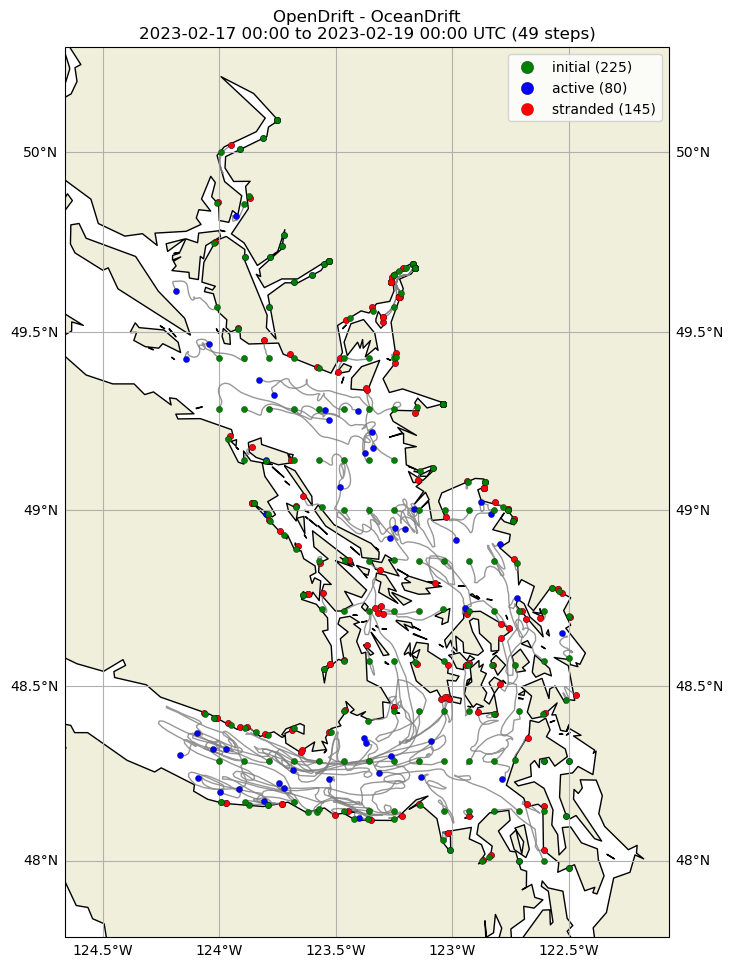

(<GeoAxes: title={'center': 'OpenDrift - OceanDrift\n2023-02-17 00:00 to 2023-02-19 00:00 UTC (49 steps)'}>,
 <Figure size 744.163x1100 with 1 Axes>)

In [7]:
o.plot()

In [8]:
d = xr.open_dataset('lons180-newopendrift.nc')
d.lon.values

array([[-1.23989998e+02, -1.23987152e+02, -1.23984085e+02, ...,
         9.96920997e+36,  9.96920997e+36,  9.96920997e+36],
       [-1.23870003e+02, -1.23869957e+02, -1.23868538e+02, ...,
        -1.24071701e+02, -1.24075157e+02, -1.24088875e+02],
       [-1.23790001e+02, -1.23795624e+02, -1.23797325e+02, ...,
         9.96920997e+36,  9.96920997e+36,  9.96920997e+36],
       ...,
       [-1.23160004e+02, -1.23161499e+02, -1.23163292e+02, ...,
         9.96920997e+36,  9.96920997e+36,  9.96920997e+36],
       [-1.23160004e+02, -1.23161499e+02, -1.23163292e+02, ...,
         9.96920997e+36,  9.96920997e+36,  9.96920997e+36],
       [-1.23160004e+02, -1.23161499e+02, -1.23163292e+02, ...,
         9.96920997e+36,  9.96920997e+36,  9.96920997e+36]], dtype=float32)

# Lons 0 to 360

In [9]:
lon_min=236
lon_max=237.5
lat_min=48
lat_max=50

lons = np.linspace(lon_min, lon_max, num=15)
lats = np.linspace(lat_min, lat_max, num=15)

lons, lats = np.meshgrid(lons, lats)

o2 = oceandrift.OceanDrift()
o2.add_reader(reader)
o2.seed_elements(lon=lons, lat=lats, time = reader.start_time)

o2.run(end_time=datetime.datetime(2023,2,19),outfile='lons360-newopendrift.nc')

11:47:56 DEBUG   opendrift.models.oceandrift:112: No machine learning correction available.
11:47:56 DEBUG   opendrift.models.basemodel:625: Adding 18 config items from basemodel
11:47:56 DEBUG   opendrift.models.basemodel:625: Adding 5 config items from basemodel
11:47:57 DEBUG   opendrift.models.basemodel:625: Adding 36 config items from basemodel
11:47:57 INFO    opendrift.models.basemodel:539: OpenDriftSimulation initialised (version 1.10.7 / v1.4.2-1580-gfab10c8)
11:47:57 DEBUG   opendrift.models.basemodel:625: Adding 14 config items from oceandrift
11:47:57 DEBUG   opendrift.models.basemodel:637:   Overwriting config item seed:z
11:47:57 DEBUG   opendrift.readers.basereader.variables:548: Setting buffer size 5 for reader /home/soontiensn/data/gpsc-jeh326/projects/stokes_drift/input_data/SalishSea/currents/*.nc, assuming a maximum average speed of 1 m/s and time span of 0:30:00
11:47:57 DEBUG   opendrift.models.basemodel:952: Added reader /home/soontiensn/data/gpsc-jeh326/projects

11:47:57 DEBUG   opendrift.models.basemodel:1231: Variable group ['x_sea_water_velocity', 'y_sea_water_velocity']
11:47:57 DEBUG   opendrift.models.basemodel:1232: ----------------------------------------
11:47:57 DEBUG   opendrift.models.basemodel:1236: Calling reader /home/soontiensn/data/gpsc-jeh326/projects/stokes_drift/input_data/SalishSea/currents/*.nc
11:47:57 DEBUG   opendrift.models.basemodel:1237: ----------------------------------------
11:47:57 DEBUG   opendrift.models.basemodel:1253: Data needed for 225 elements
11:47:57 DEBUG   opendrift.readers.basereader.variables:692: Fetching variables from /home/soontiensn/data/gpsc-jeh326/projects/stokes_drift/input_data/SalishSea/currents/*.nc
11:47:57 DEBUG   opendrift.readers.basereader.structured:178: Modulating longitudes to 0-360 for self.name
11:47:57 DEBUG   opendrift.readers.basereader.structured:184: Reader time:
		2023-02-17 00:00:00 (before)
		2023-02-17 00:30:00 (after)
11:47:57 DEBUG   opendrift.readers.reader_netCDF_C

11:47:57 DEBUG   opendrift.models.basemodel:1524:     land_binary_mask: 0 (min) 0 (max)
11:47:57 DEBUG   opendrift.models.basemodel:1526: ---------------------------------
11:47:57 DEBUG   opendrift.models.basemodel:1527: 		225 active elements
11:47:57 DEBUG   opendrift.models.basemodel:1538: 		47.98 <- latitude  -> 50.09
11:47:57 DEBUG   opendrift.models.basemodel:1543: 		235.94 <- longitude -> 237.51
11:47:57 DEBUG   opendrift.models.basemodel:1546: 		z = 0.0
11:47:57 DEBUG   opendrift.models.basemodel:1549: ---------------------------------
11:47:57 DEBUG   opendrift.models.physics_methods:868: Calculating Hs from wind, min: 0.000000, mean: 0.000000, max: 0.000000
11:47:57 DEBUG   opendrift.models.physics_methods:926: Calculating wave period Tm02 from wind
11:47:57 DEBUG   opendrift.models.physics_methods:936:    min: 1.256637, mean: 1.256637, max: 1.256637
11:47:57 DEBUG   opendrift.models.physics_methods:876: Calculating wave period from wind, min: 1.256637, mean: 1.256637, max: 1

11:47:57 DEBUG   opendrift.models.basemodel:1407:     Using fallback value 0 for y_sea_water_velocity for 32 elements
11:47:57 DEBUG   opendrift.models.basemodel:1414: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
11:47:57 DEBUG   opendrift.models.basemodel:1421:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
11:47:57 DEBUG   opendrift.models.basemodel:1522: ------------ SUMMARY -------------
11:47:57 DEBUG   opendrift.models.basemodel:1524:     x_sea_water_velocity: -1.76001 (min) 0.758114 (max)
11:47:57 DEBUG   opendrift.models.basemodel:1524:     y_sea_water_velocity: -1.24887 (min) 1.79241 (max)
11:47:57 DEBUG   opendrift.models.basemodel:1524:     x_wind: 0 (min) 0 (max)
11:47:57 DEBUG   opendrift.models.basemodel:1524:     y_wind: 0 (min) 0 (max)
11:47:57 DEBUG   opendrift.models.basemodel:1524:     upward_sea_water_velocity: 0 (min) 0 (max)
11:47:57 DEBUG   opendrift.models.basemodel:1524:     ocea

11:47:57 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 127 elements, expanding data 1
11:47:57 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 105 elements, expanding data 2
11:47:57 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 87 elements, expanding data 3
11:47:57 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 78 elements, expanding data 4
11:47:57 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 55 elements, expanding data 5
11:47:57 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 52 elements, expanding data 6
11:47:57 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 39 elements, expanding data 7
11:47:57 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 35 elements, expanding data 8
11:47:57 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 32 elements

11:47:57 DEBUG   opendrift.models.basemodel:1236: Calling reader /home/soontiensn/data/gpsc-jeh326/projects/stokes_drift/input_data/SalishSea/currents/*.nc
11:47:57 DEBUG   opendrift.models.basemodel:1237: ----------------------------------------
11:47:57 DEBUG   opendrift.models.basemodel:1253: Data needed for 189 elements
11:47:57 DEBUG   opendrift.readers.basereader.variables:692: Fetching variables from /home/soontiensn/data/gpsc-jeh326/projects/stokes_drift/input_data/SalishSea/currents/*.nc
11:47:57 DEBUG   opendrift.readers.basereader.structured:178: Modulating longitudes to 0-360 for self.name
11:47:57 DEBUG   opendrift.readers.basereader.structured:184: Reader time:
		2023-02-17 03:00:00 (before)
		2023-02-17 03:30:00 (after)
11:47:57 DEBUG   opendrift.readers.reader_netCDF_CF_generic:380: Using eastward_sea_water_velocity to retrieve x_sea_water_velocity
11:47:57 DEBUG   opendrift.readers.reader_netCDF_CF_generic:380: Using northward_sea_water_velocity to retrieve y_sea_water

11:47:57 DEBUG   opendrift.models.basemodel:1527: 		189 active elements
11:47:57 DEBUG   opendrift.models.basemodel:1538: 		47.979999542236335 <- latitude  -> 50.09000015258789
11:47:57 DEBUG   opendrift.models.basemodel:1543: 		-124.12840600963008 <- longitude -> -122.49992542666595
11:47:57 DEBUG   opendrift.models.basemodel:1546: 		z = 0.0
11:47:57 DEBUG   opendrift.models.basemodel:1549: ---------------------------------
11:47:57 DEBUG   opendrift.models.physics_methods:868: Calculating Hs from wind, min: 0.000000, mean: 0.000000, max: 0.000000
11:47:57 DEBUG   opendrift.models.physics_methods:926: Calculating wave period Tm02 from wind
11:47:57 DEBUG   opendrift.models.physics_methods:936:    min: 1.256637, mean: 1.256637, max: 1.256637
11:47:57 DEBUG   opendrift.models.physics_methods:876: Calculating wave period from wind, min: 1.256637, mean: 1.256637, max: 1.256637
11:47:57 DEBUG   opendrift.models.basemodel:2450: 4 elements scheduled for deactivation (stranded)
11:47:57 DEBUG

11:47:57 DEBUG   opendrift.models.basemodel:1384: Obtained data for all elements.
11:47:57 DEBUG   opendrift.models.basemodel:1397: ---------------------------------------
11:47:57 DEBUG   opendrift.models.basemodel:1398: Finished processing all variable groups
11:47:57 DEBUG   opendrift.models.basemodel:1407:     Using fallback value 0 for x_sea_water_velocity for 32 elements
11:47:57 DEBUG   opendrift.models.basemodel:1407:     Using fallback value 0 for y_sea_water_velocity for 32 elements
11:47:57 DEBUG   opendrift.models.basemodel:1414: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
11:47:57 DEBUG   opendrift.models.basemodel:1421:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
11:47:57 DEBUG   opendrift.models.basemodel:1522: ------------ SUMMARY -------------
11:47:57 DEBUG   opendrift.models.basemodel:1524:     x_sea_water_velocity: -0.846675 (min) 0.574385 (max)
11:47:57 DEBUG   opendrift.models.b

11:47:57 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 31 elements, expanding data 9
11:47:57 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 31 elements, expanding data 10
11:47:57 WARNING opendrift:133: Still NaN-values after 10 iterations, exiting!
11:47:57 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 101 elements, expanding data 1
11:47:57 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 79 elements, expanding data 2
11:47:57 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 54 elements, expanding data 3
11:47:57 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 45 elements, expanding data 4
11:47:57 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 35 elements, expanding data 5
11:47:57 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 35 elements, expanding data 6
11:47:57 DEBUG 

11:47:58 DEBUG   opendrift.models.basemodel:1230: ----------------------------------------
11:47:58 DEBUG   opendrift.models.basemodel:1231: Variable group ['x_sea_water_velocity', 'y_sea_water_velocity']
11:47:58 DEBUG   opendrift.models.basemodel:1232: ----------------------------------------
11:47:58 DEBUG   opendrift.models.basemodel:1236: Calling reader /home/soontiensn/data/gpsc-jeh326/projects/stokes_drift/input_data/SalishSea/currents/*.nc
11:47:58 DEBUG   opendrift.models.basemodel:1237: ----------------------------------------
11:47:58 DEBUG   opendrift.models.basemodel:1253: Data needed for 166 elements
11:47:58 DEBUG   opendrift.readers.basereader.variables:692: Fetching variables from /home/soontiensn/data/gpsc-jeh326/projects/stokes_drift/input_data/SalishSea/currents/*.nc
11:47:58 DEBUG   opendrift.readers.basereader.structured:178: Modulating longitudes to 0-360 for self.name
11:47:58 DEBUG   opendrift.readers.basereader.structured:184: Reader time:
		2023-02-17 06:00:0

11:47:58 DEBUG   opendrift.models.basemodel:1524:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
11:47:58 DEBUG   opendrift.models.basemodel:1524:     land_binary_mask: 0 (min) 1 (max)
11:47:58 DEBUG   opendrift.models.basemodel:1526: ---------------------------------
11:47:58 DEBUG   opendrift.models.basemodel:1527: 		166 active elements
11:47:58 DEBUG   opendrift.models.basemodel:1538: 		47.979999542236335 <- latitude  -> 50.09000015258789
11:47:58 DEBUG   opendrift.models.basemodel:1543: 		-124.1405597878577 <- longitude -> -122.5
11:47:58 DEBUG   opendrift.models.basemodel:1546: 		z = 0.0
11:47:58 DEBUG   opendrift.models.basemodel:1549: ---------------------------------
11:47:58 DEBUG   opendrift.models.physics_methods:868: Calculating Hs from wind, min: 0.000000, mean: 0.000000, max: 0.000000
11:47:58 DEBUG   opendrift.models.physics_methods:926: Calculating wave period Tm02 from wind
11:47:58 DEBUG   opendrift.models.physics_methods:936:    min: 1.256637, mean: 1.2

11:47:58 DEBUG   opendrift.readers.basereader.continuous:37: Fetched env-before
11:47:58 DEBUG   opendrift.readers.basereader.variables:573: Checking land_binary_mask for invalid values
11:47:58 DEBUG   opendrift.readers.basereader.variables:728: Reader projection is latlon - rotation of vectors is not needed.
11:47:58 DEBUG   opendrift.models.basemodel:1384: Obtained data for all elements.
11:47:58 DEBUG   opendrift.models.basemodel:1397: ---------------------------------------
11:47:58 DEBUG   opendrift.models.basemodel:1398: Finished processing all variable groups
11:47:58 DEBUG   opendrift.models.basemodel:1407:     Using fallback value 0 for x_sea_water_velocity for 32 elements
11:47:58 DEBUG   opendrift.models.basemodel:1407:     Using fallback value 0 for y_sea_water_velocity for 32 elements
11:47:58 DEBUG   opendrift.models.basemodel:1414: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
11:47:58 DEBUG   opendrift.models.basemode

11:47:58 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 35 elements, expanding data 6
11:47:58 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 35 elements, expanding data 7
11:47:58 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 34 elements, expanding data 8
11:47:58 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 31 elements, expanding data 9
11:47:58 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 31 elements, expanding data 10
11:47:58 WARNING opendrift:133: Still NaN-values after 10 iterations, exiting!
11:47:58 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 86 elements, expanding data 1
11:47:58 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 56 elements, expanding data 2
11:47:58 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 51 elements, expanding data 3
11:47:58 DEBUG  

11:47:58 INFO    opendrift.models.basemodel:2882: 2023-02-17 09:00:00 - step 10 of 48 - 154 active elements (71 deactivated)
11:47:58 DEBUG   opendrift.models.basemodel:2888: 0 elements scheduled.
11:47:58 DEBUG   opendrift.models.basemodel:2890: ======================================================================
11:47:58 DEBUG   opendrift.models.basemodel:1230: ----------------------------------------
11:47:58 DEBUG   opendrift.models.basemodel:1231: Variable group ['x_sea_water_velocity', 'y_sea_water_velocity']
11:47:58 DEBUG   opendrift.models.basemodel:1232: ----------------------------------------
11:47:58 DEBUG   opendrift.models.basemodel:1236: Calling reader /home/soontiensn/data/gpsc-jeh326/projects/stokes_drift/input_data/SalishSea/currents/*.nc
11:47:58 DEBUG   opendrift.models.basemodel:1237: ----------------------------------------
11:47:58 DEBUG   opendrift.models.basemodel:1253: Data needed for 154 elements
11:47:58 DEBUG   opendrift.readers.basereader.variables:692:

11:47:58 DEBUG   opendrift.models.basemodel:1524:     surface_downward_y_stress: 0 (min) 0 (max)
11:47:58 DEBUG   opendrift.models.basemodel:1524:     turbulent_kinetic_energy: 0 (min) 0 (max)
11:47:58 DEBUG   opendrift.models.basemodel:1524:     turbulent_generic_length_scale: 0 (min) 0 (max)
11:47:58 DEBUG   opendrift.models.basemodel:1524:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
11:47:58 DEBUG   opendrift.models.basemodel:1524:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
11:47:58 DEBUG   opendrift.models.basemodel:1524:     land_binary_mask: 0 (min) 1 (max)
11:47:58 DEBUG   opendrift.models.basemodel:1526: ---------------------------------
11:47:58 DEBUG   opendrift.models.basemodel:1527: 		154 active elements
11:47:58 DEBUG   opendrift.models.basemodel:1538: 		47.979999542236335 <- latitude  -> 50.09000015258789
11:47:58 DEBUG   opendrift.models.basemodel:1543: 		-124.06452513926726 <- longitude -> -122.4837969464664
11:47:58 DEBUG   opendrift.models.bas

11:47:58 DEBUG   opendrift.models.basemodel:1232: ----------------------------------------
11:47:58 DEBUG   opendrift.models.basemodel:1236: Calling reader global_landmask
11:47:58 DEBUG   opendrift.models.basemodel:1237: ----------------------------------------
11:47:58 DEBUG   opendrift.models.basemodel:1253: Data needed for 150 elements
11:47:58 DEBUG   opendrift.readers.basereader.variables:692: Fetching variables from global_landmask
11:47:58 DEBUG   opendrift.readers.basereader.continuous:37: Fetched env-before
11:47:58 DEBUG   opendrift.readers.basereader.variables:573: Checking land_binary_mask for invalid values
11:47:58 DEBUG   opendrift.readers.basereader.variables:728: Reader projection is latlon - rotation of vectors is not needed.
11:47:58 DEBUG   opendrift.models.basemodel:1384: Obtained data for all elements.
11:47:58 DEBUG   opendrift.models.basemodel:1397: ---------------------------------------
11:47:58 DEBUG   opendrift.models.basemodel:1398: Finished processing all

11:47:58 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 52 elements, expanding data 2
11:47:58 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 45 elements, expanding data 3
11:47:58 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 37 elements, expanding data 4
11:47:58 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 36 elements, expanding data 5
11:47:58 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 36 elements, expanding data 6
11:47:58 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 36 elements, expanding data 7
11:47:58 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 34 elements, expanding data 8
11:47:58 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 31 elements, expanding data 9
11:47:58 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 31 elements, 

11:47:58 DEBUG   opendrift.models.oceandrift:366: No vertical advection for elements at surface
11:47:58 DEBUG   opendrift.models.basemodel:2420: Horizontal diffusivity is 0, no random walk.
11:47:58 DEBUG   opendrift.models.basemodel:2945: 138 active elements (87 deactivated)
11:47:58 DEBUG   opendrift.models.basemodel:1658: to be seeded: 0, already seeded 225
11:47:58 DEBUG   opendrift.models.basemodel:2881: ======================================================================
11:47:58 INFO    opendrift.models.basemodel:2882: 2023-02-17 12:00:00 - step 13 of 48 - 138 active elements (87 deactivated)
11:47:58 DEBUG   opendrift.models.basemodel:2888: 0 elements scheduled.
11:47:58 DEBUG   opendrift.models.basemodel:2890: ======================================================================
11:47:58 DEBUG   opendrift.models.basemodel:1230: ----------------------------------------
11:47:58 DEBUG   opendrift.models.basemodel:1231: Variable group ['x_sea_water_velocity', 'y_sea_water_vel

11:47:58 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
11:47:58 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
11:47:58 DEBUG   opendrift.models.basemodel:1524:     surface_downward_x_stress: 0 (min) 0 (max)
11:47:58 DEBUG   opendrift.models.basemodel:1524:     surface_downward_y_stress: 0 (min) 0 (max)
11:47:58 DEBUG   opendrift.models.basemodel:1524:     turbulent_kinetic_energy: 0 (min) 0 (max)
11:47:58 DEBUG   opendrift.models.basemodel:1524:     turbulent_generic_length_scale: 0 (min) 0 (max)
11:47:58 DEBUG   opendrift.models.basemodel:1524:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
11:47:58 DEBUG   opendrift.models.basemodel:1524:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
11:47:58 DEBUG   opendrift.models.basemodel:1524:     land_binary_mask: 0 (min) 1 (max)
11:47:59 DEBUG   open

11:47:59 DEBUG   opendrift.readers.basereader.variables:769: Masking 2 elements outside coverage
11:47:59 DEBUG   opendrift.models.basemodel:1387: Data missing for 32 elements.
11:47:59 DEBUG   opendrift.models.basemodel:1230: ----------------------------------------
11:47:59 DEBUG   opendrift.models.basemodel:1231: Variable group ['land_binary_mask']
11:47:59 DEBUG   opendrift.models.basemodel:1232: ----------------------------------------
11:47:59 DEBUG   opendrift.models.basemodel:1236: Calling reader global_landmask
11:47:59 DEBUG   opendrift.models.basemodel:1237: ----------------------------------------
11:47:59 DEBUG   opendrift.models.basemodel:1253: Data needed for 136 elements
11:47:59 DEBUG   opendrift.readers.basereader.variables:692: Fetching variables from global_landmask
11:47:59 DEBUG   opendrift.readers.basereader.continuous:37: Fetched env-before
11:47:59 DEBUG   opendrift.readers.basereader.variables:573: Checking land_binary_mask for invalid values
11:47:59 DEBUG   

11:47:59 DEBUG   opendrift.readers.basereader.structured:296: Interpolating before (2023-02-17 14:00:00) in space  (linearNDFast)
11:47:59 DEBUG   opendrift.readers.interpolation.structured:80: Initialising interpolator.
11:47:59 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 69 elements, expanding data 1
11:47:59 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 45 elements, expanding data 2
11:47:59 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 43 elements, expanding data 3
11:47:59 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 34 elements, expanding data 4
11:47:59 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 33 elements, expanding data 5
11:47:59 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 33 elements, expanding data 6
11:47:59 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 33 elements, expan

11:47:59 DEBUG   opendrift.models.basemodel:2482: Removed 3 values from environment_profiles.
11:47:59 DEBUG   opendrift.models.basemodel:2930: Calling OceanDrift.update()
11:47:59 DEBUG   opendrift.models.physics_methods:727: No wind for wind-sheared ocean drift
11:47:59 DEBUG   opendrift.models.physics_methods:755: No Stokes drift velocity available
11:47:59 DEBUG   opendrift.models.oceandrift:366: No vertical advection for elements at surface
11:47:59 DEBUG   opendrift.models.basemodel:2420: Horizontal diffusivity is 0, no random walk.
11:47:59 DEBUG   opendrift.models.basemodel:2945: 129 active elements (96 deactivated)
11:47:59 DEBUG   opendrift.models.basemodel:1658: to be seeded: 0, already seeded 225
11:47:59 DEBUG   opendrift.models.basemodel:2881: ======================================================================
11:47:59 INFO    opendrift.models.basemodel:2882: 2023-02-17 15:00:00 - step 16 of 48 - 129 active elements (96 deactivated)
11:47:59 DEBUG   opendrift.models.ba

11:47:59 DEBUG   opendrift.models.basemodel:1524:     ocean_vertical_diffusivity: 0 (min) 0 (max)
11:47:59 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_significant_height: 0 (min) 0 (max)
11:47:59 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
11:47:59 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
11:47:59 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
11:47:59 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
11:47:59 DEBUG   opendrift.models.basemodel:1524:     surface_downward_x_stress: 0 (min) 0 (max)
11:47:59 DEBUG   opendrift.models.basemodel:1524:     surface_downward_y_stress: 0 (min) 0 (max)
11:47:59 DEBUG   opendrift.models.basemodel:1524:     turbulent_kinetic_energy: 0 (min) 0 

11:47:59 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 31 elements, expanding data 10
11:47:59 WARNING opendrift:133: Still NaN-values after 10 iterations, exiting!
11:47:59 DEBUG   opendrift.readers.basereader.structured:350: No time interpolation needed - right on time.
11:47:59 DEBUG   opendrift.readers.basereader.variables:728: Reader projection is latlon - rotation of vectors is not needed.
11:47:59 DEBUG   opendrift.readers.basereader.variables:769: Masking 2 elements outside coverage
11:47:59 DEBUG   opendrift.models.basemodel:1387: Data missing for 32 elements.
11:47:59 DEBUG   opendrift.models.basemodel:1230: ----------------------------------------
11:47:59 DEBUG   opendrift.models.basemodel:1231: Variable group ['land_binary_mask']
11:47:59 DEBUG   opendrift.models.basemodel:1232: ----------------------------------------
11:47:59 DEBUG   opendrift.models.basemodel:1236: Calling reader global_landmask
11:47:59 DEBUG   opendrift.models.basemodel:123

11:47:59 DEBUG   opendrift.readers.interpolation.structured:80: Initialising interpolator.
11:47:59 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 52 elements, expanding data 1
11:47:59 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 46 elements, expanding data 2
11:47:59 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 43 elements, expanding data 3
11:47:59 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 34 elements, expanding data 4
11:47:59 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 33 elements, expanding data 5
11:47:59 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 33 elements, expanding data 6
11:47:59 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 32 elements, expanding data 7
11:47:59 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 31 elements, expanding data 8
11:47

11:47:59 DEBUG   opendrift.models.physics_methods:727: No wind for wind-sheared ocean drift
11:47:59 DEBUG   opendrift.models.physics_methods:755: No Stokes drift velocity available
11:47:59 DEBUG   opendrift.models.oceandrift:366: No vertical advection for elements at surface
11:47:59 DEBUG   opendrift.models.basemodel:2420: Horizontal diffusivity is 0, no random walk.
11:47:59 DEBUG   opendrift.models.basemodel:2945: 126 active elements (99 deactivated)
11:47:59 DEBUG   opendrift.models.basemodel:1658: to be seeded: 0, already seeded 225
11:47:59 DEBUG   opendrift.models.basemodel:2881: ======================================================================
11:47:59 INFO    opendrift.models.basemodel:2882: 2023-02-17 18:00:00 - step 19 of 48 - 126 active elements (99 deactivated)
11:47:59 DEBUG   opendrift.models.basemodel:2888: 0 elements scheduled.
11:47:59 DEBUG   opendrift.models.basemodel:2890: ======================================================================
11:47:59 DEBUG 

11:47:59 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
11:47:59 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
11:47:59 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
11:47:59 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
11:47:59 DEBUG   opendrift.models.basemodel:1524:     surface_downward_x_stress: 0 (min) 0 (max)
11:47:59 DEBUG   opendrift.models.basemodel:1524:     surface_downward_y_stress: 0 (min) 0 (max)
11:47:59 DEBUG   opendrift.models.basemodel:1524:     turbulent_kinetic_energy: 0 (min) 0 (max)
11:47:59 DEBUG   opendrift.models.basemodel:1524:     turbulent_generic_length_scale: 0 (min) 0 (max)
11:47:59 DEBUG   opendrift.models.basemodel:1524:     ocean_mixed_layer_thickness: 50 (min) 50 (m

11:47:59 DEBUG   opendrift.readers.basereader.structured:350: No time interpolation needed - right on time.
11:47:59 DEBUG   opendrift.readers.basereader.variables:728: Reader projection is latlon - rotation of vectors is not needed.
11:47:59 DEBUG   opendrift.readers.basereader.variables:769: Masking 2 elements outside coverage
11:47:59 DEBUG   opendrift.models.basemodel:1387: Data missing for 32 elements.
11:47:59 DEBUG   opendrift.models.basemodel:1230: ----------------------------------------
11:47:59 DEBUG   opendrift.models.basemodel:1231: Variable group ['land_binary_mask']
11:47:59 DEBUG   opendrift.models.basemodel:1232: ----------------------------------------
11:47:59 DEBUG   opendrift.models.basemodel:1236: Calling reader global_landmask
11:47:59 DEBUG   opendrift.models.basemodel:1237: ----------------------------------------
11:47:59 DEBUG   opendrift.models.basemodel:1253: Data needed for 123 elements
11:47:59 DEBUG   opendrift.readers.basereader.variables:692: Fetching 

11:48:00 DEBUG   opendrift.readers.basereader.variables:573: Checking y_sea_water_velocity for invalid values
11:48:00 DEBUG   opendrift.readers.basereader.structured:253: Fetched env-block (size 240x468x1) for time before (2023-02-17 20:00:00)
11:48:00 DEBUG   opendrift.readers.basereader.structured:296: Interpolating before (2023-02-17 20:00:00) in space  (linearNDFast)
11:48:00 DEBUG   opendrift.readers.interpolation.structured:80: Initialising interpolator.
11:48:00 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 45 elements, expanding data 1
11:48:00 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 38 elements, expanding data 2
11:48:00 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 35 elements, expanding data 3
11:48:00 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 33 elements, expanding data 4
11:48:00 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for

11:48:00 DEBUG   opendrift.models.basemodel:2478: remove items from profile for z
11:48:00 DEBUG   opendrift.models.basemodel:2478: remove items from profile for ocean_vertical_diffusivity
11:48:00 DEBUG   opendrift.models.basemodel:2482: Removed 2 values from environment_profiles.
11:48:00 DEBUG   opendrift.models.basemodel:2930: Calling OceanDrift.update()
11:48:00 DEBUG   opendrift.models.physics_methods:727: No wind for wind-sheared ocean drift
11:48:00 DEBUG   opendrift.models.physics_methods:755: No Stokes drift velocity available
11:48:00 DEBUG   opendrift.models.oceandrift:366: No vertical advection for elements at surface
11:48:00 DEBUG   opendrift.models.basemodel:2420: Horizontal diffusivity is 0, no random walk.
11:48:00 DEBUG   opendrift.models.basemodel:2945: 114 active elements (111 deactivated)
11:48:00 DEBUG   opendrift.models.basemodel:1658: to be seeded: 0, already seeded 225
11:48:00 DEBUG   opendrift.models.basemodel:2881: ==========================================

11:48:00 DEBUG   opendrift.models.basemodel:1524:     y_wind: 0 (min) 0 (max)
11:48:00 DEBUG   opendrift.models.basemodel:1524:     upward_sea_water_velocity: 0 (min) 0 (max)
11:48:00 DEBUG   opendrift.models.basemodel:1524:     ocean_vertical_diffusivity: 0 (min) 0 (max)
11:48:00 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_significant_height: 0 (min) 0 (max)
11:48:00 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
11:48:00 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
11:48:00 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
11:48:00 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
11:48:00 DEBUG   opendrift.models.basemodel:1524:     surface_downward_x_stress: 0 (min) 0 (max)
11:48:00 DEB

11:48:00 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 31 elements, expanding data 8
11:48:00 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 31 elements, expanding data 9
11:48:00 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 31 elements, expanding data 10
11:48:00 WARNING opendrift:133: Still NaN-values after 10 iterations, exiting!
11:48:00 DEBUG   opendrift.readers.basereader.structured:350: No time interpolation needed - right on time.
11:48:00 DEBUG   opendrift.readers.basereader.variables:728: Reader projection is latlon - rotation of vectors is not needed.
11:48:00 DEBUG   opendrift.readers.basereader.variables:769: Masking 2 elements outside coverage
11:48:00 DEBUG   opendrift.models.basemodel:1387: Data missing for 32 elements.
11:48:00 DEBUG   opendrift.models.basemodel:1230: ----------------------------------------
11:48:00 DEBUG   opendrift.models.basemodel:1231: Variable group ['land_binary_

11:48:00 DEBUG   opendrift.readers.reader_netCDF_CF_generic:380: Using northward_sea_water_velocity to retrieve y_sea_water_velocity
11:48:00 DEBUG   opendrift.readers.reader_netCDF_CF_generic:464: North is up, no rotation necessary
11:48:00 DEBUG   opendrift.readers.basereader.variables:573: Checking x_sea_water_velocity for invalid values
11:48:00 DEBUG   opendrift.readers.basereader.variables:573: Checking y_sea_water_velocity for invalid values
11:48:00 DEBUG   opendrift.readers.basereader.structured:253: Fetched env-block (size 241x468x1) for time before (2023-02-17 23:00:00)
11:48:00 DEBUG   opendrift.readers.basereader.structured:296: Interpolating before (2023-02-17 23:00:00) in space  (linearNDFast)
11:48:00 DEBUG   opendrift.readers.interpolation.structured:80: Initialising interpolator.
11:48:00 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 42 elements, expanding data 1
11:48:00 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values

11:48:00 DEBUG   opendrift.models.basemodel:2450: 4 elements scheduled for deactivation (stranded)
11:48:00 DEBUG   opendrift.models.basemodel:2452: 	(z: 0.000000 to 0.000000)
11:48:00 DEBUG   opendrift.models.basemodel:2470: Removed 4 elements.
11:48:00 DEBUG   opendrift.models.basemodel:2473: Removed 4 values from environment.
11:48:00 DEBUG   opendrift.models.basemodel:2478: remove items from profile for z
11:48:00 DEBUG   opendrift.models.basemodel:2478: remove items from profile for ocean_vertical_diffusivity
11:48:00 DEBUG   opendrift.models.basemodel:2482: Removed 4 values from environment_profiles.
11:48:00 DEBUG   opendrift.models.basemodel:2930: Calling OceanDrift.update()
11:48:00 DEBUG   opendrift.models.physics_methods:727: No wind for wind-sheared ocean drift
11:48:00 DEBUG   opendrift.models.physics_methods:755: No Stokes drift velocity available
11:48:00 DEBUG   opendrift.models.oceandrift:366: No vertical advection for elements at surface
11:48:00 DEBUG   opendrift.mod

11:48:00 DEBUG   opendrift.models.basemodel:1522: ------------ SUMMARY -------------
11:48:00 DEBUG   opendrift.models.basemodel:1524:     x_sea_water_velocity: -1.48534 (min) 0.614193 (max)
11:48:00 DEBUG   opendrift.models.basemodel:1524:     y_sea_water_velocity: -1.40108 (min) 0.526522 (max)
11:48:00 DEBUG   opendrift.models.basemodel:1524:     x_wind: 0 (min) 0 (max)
11:48:00 DEBUG   opendrift.models.basemodel:1524:     y_wind: 0 (min) 0 (max)
11:48:00 DEBUG   opendrift.models.basemodel:1524:     upward_sea_water_velocity: 0 (min) 0 (max)
11:48:00 DEBUG   opendrift.models.basemodel:1524:     ocean_vertical_diffusivity: 0 (min) 0 (max)
11:48:00 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_significant_height: 0 (min) 0 (max)
11:48:00 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
11:48:00 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
11:48:00 DEBUG   open

11:48:00 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 31 elements, expanding data 10
11:48:00 WARNING opendrift:133: Still NaN-values after 10 iterations, exiting!
11:48:00 DEBUG   opendrift.readers.basereader.structured:350: No time interpolation needed - right on time.
11:48:00 DEBUG   opendrift.readers.basereader.variables:728: Reader projection is latlon - rotation of vectors is not needed.
11:48:00 DEBUG   opendrift.readers.basereader.variables:769: Masking 2 elements outside coverage
11:48:00 DEBUG   opendrift.models.basemodel:1387: Data missing for 32 elements.
11:48:00 DEBUG   opendrift.models.basemodel:1230: ----------------------------------------
11:48:00 DEBUG   opendrift.models.basemodel:1231: Variable group ['land_binary_mask']
11:48:00 DEBUG   opendrift.models.basemodel:1232: ----------------------------------------
11:48:00 DEBUG   opendrift.models.basemodel:1236: Calling reader global_landmask
11:48:00 DEBUG   opendrift.models.basemodel:123

11:48:00 DEBUG   opendrift.readers.interpolation.structured:80: Initialising interpolator.
11:48:00 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 54 elements, expanding data 1
11:48:00 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 34 elements, expanding data 2
11:48:00 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 33 elements, expanding data 3
11:48:00 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 32 elements, expanding data 4
11:48:00 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 32 elements, expanding data 5
11:48:00 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 32 elements, expanding data 6
11:48:00 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 32 elements, expanding data 7
11:48:00 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 31 elements, expanding data 8
11:48

11:48:00 DEBUG   opendrift.models.physics_methods:727: No wind for wind-sheared ocean drift
11:48:00 DEBUG   opendrift.models.physics_methods:755: No Stokes drift velocity available
11:48:00 DEBUG   opendrift.models.oceandrift:366: No vertical advection for elements at surface
11:48:00 DEBUG   opendrift.models.basemodel:2420: Horizontal diffusivity is 0, no random walk.
11:48:00 DEBUG   opendrift.models.basemodel:2945: 87 active elements (138 deactivated)
11:48:00 DEBUG   opendrift.models.basemodel:1658: to be seeded: 0, already seeded 225
11:48:00 DEBUG   opendrift.models.basemodel:2881: ======================================================================
11:48:00 INFO    opendrift.models.basemodel:2882: 2023-02-18 03:00:00 - step 28 of 48 - 87 active elements (138 deactivated)
11:48:00 DEBUG   opendrift.models.basemodel:2888: 0 elements scheduled.
11:48:00 DEBUG   opendrift.models.basemodel:2890: ======================================================================
11:48:00 DEBUG 

11:48:01 DEBUG   opendrift.models.basemodel:1524:     upward_sea_water_velocity: 0 (min) 0 (max)
11:48:01 DEBUG   opendrift.models.basemodel:1524:     ocean_vertical_diffusivity: 0 (min) 0 (max)
11:48:01 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_significant_height: 0 (min) 0 (max)
11:48:01 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
11:48:01 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
11:48:01 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
11:48:01 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
11:48:01 DEBUG   opendrift.models.basemodel:1524:     surface_downward_x_stress: 0 (min) 0 (max)
11:48:01 DEBUG   opendrift.models.basemodel:1524:     surface_downward_y_stress: 0 (min) 0

11:48:01 DEBUG   opendrift.readers.basereader.variables:769: Masking 2 elements outside coverage
11:48:01 DEBUG   opendrift.models.basemodel:1387: Data missing for 32 elements.
11:48:01 DEBUG   opendrift.models.basemodel:1230: ----------------------------------------
11:48:01 DEBUG   opendrift.models.basemodel:1231: Variable group ['land_binary_mask']
11:48:01 DEBUG   opendrift.models.basemodel:1232: ----------------------------------------
11:48:01 DEBUG   opendrift.models.basemodel:1236: Calling reader global_landmask
11:48:01 DEBUG   opendrift.models.basemodel:1237: ----------------------------------------
11:48:01 DEBUG   opendrift.models.basemodel:1253: Data needed for 87 elements
11:48:01 DEBUG   opendrift.readers.basereader.variables:692: Fetching variables from global_landmask
11:48:01 DEBUG   opendrift.readers.basereader.continuous:37: Fetched env-before
11:48:01 DEBUG   opendrift.readers.basereader.variables:573: Checking land_binary_mask for invalid values
11:48:01 DEBUG   o

11:48:01 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 32 elements, expanding data 4
11:48:01 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 32 elements, expanding data 5
11:48:01 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 32 elements, expanding data 6
11:48:01 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 32 elements, expanding data 7
11:48:01 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 31 elements, expanding data 8
11:48:01 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 31 elements, expanding data 9
11:48:01 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 31 elements, expanding data 10
11:48:01 WARNING opendrift:133: Still NaN-values after 10 iterations, exiting!
11:48:01 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 38 elements, expanding data 1
11:48:01 DEBUG  

11:48:01 DEBUG   opendrift.models.basemodel:1230: ----------------------------------------
11:48:01 DEBUG   opendrift.models.basemodel:1231: Variable group ['x_sea_water_velocity', 'y_sea_water_velocity']
11:48:01 DEBUG   opendrift.models.basemodel:1232: ----------------------------------------
11:48:01 DEBUG   opendrift.models.basemodel:1236: Calling reader /home/soontiensn/data/gpsc-jeh326/projects/stokes_drift/input_data/SalishSea/currents/*.nc
11:48:01 DEBUG   opendrift.models.basemodel:1237: ----------------------------------------
11:48:01 DEBUG   opendrift.models.basemodel:1253: Data needed for 87 elements
11:48:01 DEBUG   opendrift.readers.basereader.variables:692: Fetching variables from /home/soontiensn/data/gpsc-jeh326/projects/stokes_drift/input_data/SalishSea/currents/*.nc
11:48:01 DEBUG   opendrift.readers.basereader.structured:178: Modulating longitudes to 0-360 for self.name
11:48:01 DEBUG   opendrift.readers.basereader.structured:184: Reader time:
		2023-02-18 06:00:00

11:48:01 DEBUG   opendrift.models.basemodel:1524:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
11:48:01 DEBUG   opendrift.models.basemodel:1524:     land_binary_mask: 0 (min) 0 (max)
11:48:01 DEBUG   opendrift.models.basemodel:1526: ---------------------------------
11:48:01 DEBUG   opendrift.models.basemodel:1527: 		87 active elements
11:48:01 DEBUG   opendrift.models.basemodel:1538: 		47.979999542236335 <- latitude  -> 50.09000015258789
11:48:01 DEBUG   opendrift.models.basemodel:1543: 		-124.25684913077006 <- longitude -> -122.5
11:48:01 DEBUG   opendrift.models.basemodel:1546: 		z = 0.0
11:48:01 DEBUG   opendrift.models.basemodel:1549: ---------------------------------
11:48:01 DEBUG   opendrift.models.physics_methods:868: Calculating Hs from wind, min: 0.000000, mean: 0.000000, max: 0.000000
11:48:01 DEBUG   opendrift.models.physics_methods:926: Calculating wave period Tm02 from wind
11:48:01 DEBUG   opendrift.models.physics_methods:936:    min: 1.256637, mean: 1.2

11:48:01 DEBUG   opendrift.models.basemodel:1398: Finished processing all variable groups
11:48:01 DEBUG   opendrift.models.basemodel:1407:     Using fallback value 0 for x_sea_water_velocity for 32 elements
11:48:01 DEBUG   opendrift.models.basemodel:1407:     Using fallback value 0 for y_sea_water_velocity for 32 elements
11:48:01 DEBUG   opendrift.models.basemodel:1414: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
11:48:01 DEBUG   opendrift.models.basemodel:1421:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
11:48:01 DEBUG   opendrift.models.basemodel:1522: ------------ SUMMARY -------------
11:48:01 DEBUG   opendrift.models.basemodel:1524:     x_sea_water_velocity: -0.508327 (min) 0.840992 (max)
11:48:01 DEBUG   opendrift.models.basemodel:1524:     y_sea_water_velocity: -0.407564 (min) 1.11688 (max)
11:48:01 DEBUG   opendrift.models.basemodel:1524:     x_wind: 0 (min) 0 (max)
11:48:01 DEBUG   opendr

11:48:01 WARNING opendrift:133: Still NaN-values after 10 iterations, exiting!
11:48:01 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 37 elements, expanding data 1
11:48:01 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 36 elements, expanding data 2
11:48:01 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 34 elements, expanding data 3
11:48:01 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 33 elements, expanding data 4
11:48:01 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 32 elements, expanding data 5
11:48:01 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 32 elements, expanding data 6
11:48:01 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 32 elements, expanding data 7
11:48:01 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 31 elements, expanding data 8
11:48:01 DEBUG   

11:48:01 DEBUG   opendrift.readers.basereader.structured:178: Modulating longitudes to 0-360 for self.name
11:48:01 DEBUG   opendrift.readers.basereader.structured:184: Reader time:
		2023-02-18 09:00:00 (before)
		2023-02-18 09:30:00 (after)
11:48:01 DEBUG   opendrift.readers.reader_netCDF_CF_generic:380: Using eastward_sea_water_velocity to retrieve x_sea_water_velocity
11:48:01 DEBUG   opendrift.readers.reader_netCDF_CF_generic:380: Using northward_sea_water_velocity to retrieve y_sea_water_velocity
11:48:01 DEBUG   opendrift.readers.reader_netCDF_CF_generic:464: North is up, no rotation necessary
11:48:01 DEBUG   opendrift.readers.basereader.variables:573: Checking x_sea_water_velocity for invalid values
11:48:01 DEBUG   opendrift.readers.basereader.variables:573: Checking y_sea_water_velocity for invalid values
11:48:01 DEBUG   opendrift.readers.basereader.structured:253: Fetched env-block (size 255x468x1) for time before (2023-02-18 09:00:00)
11:48:01 DEBUG   opendrift.readers.ba

11:48:01 DEBUG   opendrift.models.physics_methods:926: Calculating wave period Tm02 from wind
11:48:01 DEBUG   opendrift.models.physics_methods:936:    min: 1.256637, mean: 1.256637, max: 1.256637
11:48:01 DEBUG   opendrift.models.physics_methods:876: Calculating wave period from wind, min: 1.256637, mean: 1.256637, max: 1.256637
11:48:01 DEBUG   opendrift.models.basemodel:2466: No elements to deactivate
11:48:01 DEBUG   opendrift.models.basemodel:2930: Calling OceanDrift.update()
11:48:01 DEBUG   opendrift.models.physics_methods:727: No wind for wind-sheared ocean drift
11:48:01 DEBUG   opendrift.models.physics_methods:755: No Stokes drift velocity available
11:48:01 DEBUG   opendrift.models.oceandrift:366: No vertical advection for elements at surface
11:48:01 DEBUG   opendrift.models.basemodel:2420: Horizontal diffusivity is 0, no random walk.
11:48:01 DEBUG   opendrift.models.basemodel:2945: 86 active elements (139 deactivated)
11:48:01 DEBUG   opendrift.models.basemodel:1658: to b

11:48:02 DEBUG   opendrift.models.basemodel:1524:     x_wind: 0 (min) 0 (max)
11:48:02 DEBUG   opendrift.models.basemodel:1524:     y_wind: 0 (min) 0 (max)
11:48:02 DEBUG   opendrift.models.basemodel:1524:     upward_sea_water_velocity: 0 (min) 0 (max)
11:48:02 DEBUG   opendrift.models.basemodel:1524:     ocean_vertical_diffusivity: 0 (min) 0 (max)
11:48:02 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_significant_height: 0 (min) 0 (max)
11:48:02 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
11:48:02 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
11:48:02 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
11:48:02 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
11:48:02 DEBUG   opendrift.mode

11:48:02 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 31 elements, expanding data 8
11:48:02 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 31 elements, expanding data 9
11:48:02 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 31 elements, expanding data 10
11:48:02 WARNING opendrift:133: Still NaN-values after 10 iterations, exiting!
11:48:02 DEBUG   opendrift.readers.basereader.structured:350: No time interpolation needed - right on time.
11:48:02 DEBUG   opendrift.readers.basereader.variables:728: Reader projection is latlon - rotation of vectors is not needed.
11:48:02 DEBUG   opendrift.readers.basereader.variables:769: Masking 2 elements outside coverage
11:48:02 DEBUG   opendrift.models.basemodel:1387: Data missing for 32 elements.
11:48:02 DEBUG   opendrift.models.basemodel:1230: ----------------------------------------
11:48:02 DEBUG   opendrift.models.basemodel:1231: Variable group ['land_binary_

11:48:02 DEBUG   opendrift.readers.basereader.structured:253: Fetched env-block (size 243x468x1) for time before (2023-02-18 12:00:00)
11:48:02 DEBUG   opendrift.readers.basereader.structured:296: Interpolating before (2023-02-18 12:00:00) in space  (linearNDFast)
11:48:02 DEBUG   opendrift.readers.interpolation.structured:80: Initialising interpolator.
11:48:02 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 39 elements, expanding data 1
11:48:02 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 36 elements, expanding data 2
11:48:02 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 33 elements, expanding data 3
11:48:02 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 32 elements, expanding data 4
11:48:02 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 32 elements, expanding data 5
11:48:02 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values 

11:48:02 DEBUG   opendrift.models.basemodel:2478: remove items from profile for ocean_vertical_diffusivity
11:48:02 DEBUG   opendrift.models.basemodel:2482: Removed 1 values from environment_profiles.
11:48:02 DEBUG   opendrift.models.basemodel:2930: Calling OceanDrift.update()
11:48:02 DEBUG   opendrift.models.physics_methods:727: No wind for wind-sheared ocean drift
11:48:02 DEBUG   opendrift.models.physics_methods:755: No Stokes drift velocity available
11:48:02 DEBUG   opendrift.models.oceandrift:366: No vertical advection for elements at surface
11:48:02 DEBUG   opendrift.models.basemodel:2420: Horizontal diffusivity is 0, no random walk.
11:48:02 DEBUG   opendrift.models.basemodel:2945: 84 active elements (141 deactivated)
11:48:02 DEBUG   opendrift.models.basemodel:1658: to be seeded: 0, already seeded 225
11:48:02 DEBUG   opendrift.models.basemodel:2881: ======================================================================
11:48:02 INFO    opendrift.models.basemodel:2882: 2023

11:48:02 DEBUG   opendrift.models.basemodel:1524:     upward_sea_water_velocity: 0 (min) 0 (max)
11:48:02 DEBUG   opendrift.models.basemodel:1524:     ocean_vertical_diffusivity: 0 (min) 0 (max)
11:48:02 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_significant_height: 0 (min) 0 (max)
11:48:02 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
11:48:02 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
11:48:02 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
11:48:02 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
11:48:02 DEBUG   opendrift.models.basemodel:1524:     surface_downward_x_stress: 0 (min) 0 (max)
11:48:02 DEBUG   opendrift.models.basemodel:1524:     surface_downward_y_stress: 0 (min) 0

11:48:02 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 31 elements, expanding data 9
11:48:02 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 31 elements, expanding data 10
11:48:02 WARNING opendrift:133: Still NaN-values after 10 iterations, exiting!
11:48:02 DEBUG   opendrift.readers.basereader.structured:350: No time interpolation needed - right on time.
11:48:02 DEBUG   opendrift.readers.basereader.variables:728: Reader projection is latlon - rotation of vectors is not needed.
11:48:02 DEBUG   opendrift.readers.basereader.variables:769: Masking 2 elements outside coverage
11:48:02 DEBUG   opendrift.models.basemodel:1387: Data missing for 32 elements.
11:48:02 DEBUG   opendrift.models.basemodel:1230: ----------------------------------------
11:48:02 DEBUG   opendrift.models.basemodel:1231: Variable group ['land_binary_mask']
11:48:02 DEBUG   opendrift.models.basemodel:1232: ----------------------------------------
11:48:02 DEBUG 

11:48:02 DEBUG   opendrift.readers.basereader.structured:296: Interpolating before (2023-02-18 15:00:00) in space  (linearNDFast)
11:48:02 DEBUG   opendrift.readers.interpolation.structured:80: Initialising interpolator.
11:48:02 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 40 elements, expanding data 1
11:48:02 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 37 elements, expanding data 2
11:48:02 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 33 elements, expanding data 3
11:48:02 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 32 elements, expanding data 4
11:48:02 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 32 elements, expanding data 5
11:48:02 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 32 elements, expanding data 6
11:48:02 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 32 elements, expan

11:48:02 DEBUG   opendrift.models.basemodel:2945: 83 active elements (142 deactivated)
11:48:02 DEBUG   opendrift.models.basemodel:1658: to be seeded: 0, already seeded 225
11:48:02 DEBUG   opendrift.models.basemodel:2881: ======================================================================
11:48:02 INFO    opendrift.models.basemodel:2882: 2023-02-18 16:00:00 - step 41 of 48 - 83 active elements (142 deactivated)
11:48:02 DEBUG   opendrift.models.basemodel:2888: 0 elements scheduled.
11:48:02 DEBUG   opendrift.models.basemodel:2890: ======================================================================
11:48:02 DEBUG   opendrift.models.basemodel:1230: ----------------------------------------
11:48:02 DEBUG   opendrift.models.basemodel:1231: Variable group ['x_sea_water_velocity', 'y_sea_water_velocity']
11:48:02 DEBUG   opendrift.models.basemodel:1232: ----------------------------------------
11:48:02 DEBUG   opendrift.models.basemodel:1236: Calling reader /home/soontiensn/data/gpsc-

11:48:02 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
11:48:02 DEBUG   opendrift.models.basemodel:1524:     surface_downward_x_stress: 0 (min) 0 (max)
11:48:02 DEBUG   opendrift.models.basemodel:1524:     surface_downward_y_stress: 0 (min) 0 (max)
11:48:02 DEBUG   opendrift.models.basemodel:1524:     turbulent_kinetic_energy: 0 (min) 0 (max)
11:48:02 DEBUG   opendrift.models.basemodel:1524:     turbulent_generic_length_scale: 0 (min) 0 (max)
11:48:02 DEBUG   opendrift.models.basemodel:1524:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
11:48:02 DEBUG   opendrift.models.basemodel:1524:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
11:48:02 DEBUG   opendrift.models.basemodel:1524:     land_binary_mask: 0 (min) 0 (max)
11:48:02 DEBUG   opendrift.models.basemodel:1526: ---------------------------------
11:48:02 DEBUG   opendrift.models.basemodel:1527: 		83 active element

11:48:03 DEBUG   opendrift.models.basemodel:1253: Data needed for 83 elements
11:48:03 DEBUG   opendrift.readers.basereader.variables:692: Fetching variables from global_landmask
11:48:03 DEBUG   opendrift.readers.basereader.continuous:37: Fetched env-before
11:48:03 DEBUG   opendrift.readers.basereader.variables:573: Checking land_binary_mask for invalid values
11:48:03 DEBUG   opendrift.readers.basereader.variables:728: Reader projection is latlon - rotation of vectors is not needed.
11:48:03 DEBUG   opendrift.models.basemodel:1384: Obtained data for all elements.
11:48:03 DEBUG   opendrift.models.basemodel:1397: ---------------------------------------
11:48:03 DEBUG   opendrift.models.basemodel:1398: Finished processing all variable groups
11:48:03 DEBUG   opendrift.models.basemodel:1407:     Using fallback value 0 for x_sea_water_velocity for 32 elements
11:48:03 DEBUG   opendrift.models.basemodel:1407:     Using fallback value 0 for y_sea_water_velocity for 32 elements
11:48:03 DE

11:48:03 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 31 elements, expanding data 9
11:48:03 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 31 elements, expanding data 10
11:48:03 WARNING opendrift:133: Still NaN-values after 10 iterations, exiting!
11:48:03 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 38 elements, expanding data 1
11:48:03 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 36 elements, expanding data 2
11:48:03 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 33 elements, expanding data 3
11:48:03 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 32 elements, expanding data 4
11:48:03 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 32 elements, expanding data 5
11:48:03 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 32 elements, expanding data 6
11:48:03 DEBUG  

11:48:03 DEBUG   opendrift.models.basemodel:1230: ----------------------------------------
11:48:03 DEBUG   opendrift.models.basemodel:1231: Variable group ['x_sea_water_velocity', 'y_sea_water_velocity']
11:48:03 DEBUG   opendrift.models.basemodel:1232: ----------------------------------------
11:48:03 DEBUG   opendrift.models.basemodel:1236: Calling reader /home/soontiensn/data/gpsc-jeh326/projects/stokes_drift/input_data/SalishSea/currents/*.nc
11:48:03 DEBUG   opendrift.models.basemodel:1237: ----------------------------------------
11:48:03 DEBUG   opendrift.models.basemodel:1253: Data needed for 82 elements
11:48:03 DEBUG   opendrift.readers.basereader.variables:692: Fetching variables from /home/soontiensn/data/gpsc-jeh326/projects/stokes_drift/input_data/SalishSea/currents/*.nc
11:48:03 DEBUG   opendrift.readers.basereader.structured:178: Modulating longitudes to 0-360 for self.name
11:48:03 DEBUG   opendrift.readers.basereader.structured:184: Reader time:
		2023-02-18 19:00:00

11:48:03 DEBUG   opendrift.models.basemodel:1524:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
11:48:03 DEBUG   opendrift.models.basemodel:1524:     land_binary_mask: 0 (min) 0 (max)
11:48:03 DEBUG   opendrift.models.basemodel:1526: ---------------------------------
11:48:03 DEBUG   opendrift.models.basemodel:1527: 		82 active elements
11:48:03 DEBUG   opendrift.models.basemodel:1538: 		47.979999542236335 <- latitude  -> 50.09000015258789
11:48:03 DEBUG   opendrift.models.basemodel:1543: 		-124.19540279346789 <- longitude -> -122.5
11:48:03 DEBUG   opendrift.models.basemodel:1546: 		z = 0.0
11:48:03 DEBUG   opendrift.models.basemodel:1549: ---------------------------------
11:48:03 DEBUG   opendrift.models.physics_methods:868: Calculating Hs from wind, min: 0.000000, mean: 0.000000, max: 0.000000
11:48:03 DEBUG   opendrift.models.physics_methods:926: Calculating wave period Tm02 from wind
11:48:03 DEBUG   opendrift.models.physics_methods:936:    min: 1.256637, mean: 1.2

11:48:03 DEBUG   opendrift.models.basemodel:1398: Finished processing all variable groups
11:48:03 DEBUG   opendrift.models.basemodel:1407:     Using fallback value 0 for x_sea_water_velocity for 32 elements
11:48:03 DEBUG   opendrift.models.basemodel:1407:     Using fallback value 0 for y_sea_water_velocity for 32 elements
11:48:03 DEBUG   opendrift.models.basemodel:1414: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
11:48:03 DEBUG   opendrift.models.basemodel:1421:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
11:48:03 DEBUG   opendrift.models.basemodel:1522: ------------ SUMMARY -------------
11:48:03 DEBUG   opendrift.models.basemodel:1524:     x_sea_water_velocity: -0.293311 (min) 0.434944 (max)
11:48:03 DEBUG   opendrift.models.basemodel:1524:     y_sea_water_velocity: -0.351244 (min) 0.536074 (max)
11:48:03 DEBUG   opendrift.models.basemodel:1524:     x_wind: 0 (min) 0 (max)
11:48:03 DEBUG   opend

11:48:03 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 32 elements, expanding data 5
11:48:03 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 32 elements, expanding data 6
11:48:03 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 32 elements, expanding data 7
11:48:03 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 31 elements, expanding data 8
11:48:03 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 31 elements, expanding data 9
11:48:03 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 31 elements, expanding data 10
11:48:03 WARNING opendrift:133: Still NaN-values after 10 iterations, exiting!
11:48:03 DEBUG   opendrift.readers.basereader.structured:350: No time interpolation needed - right on time.
11:48:03 DEBUG   opendrift.readers.basereader.variables:728: Reader projection is latlon - rotation of vectors is not needed.
11:48:03

11:48:03 DEBUG   opendrift.readers.reader_netCDF_CF_generic:464: North is up, no rotation necessary
11:48:03 DEBUG   opendrift.readers.basereader.variables:573: Checking x_sea_water_velocity for invalid values
11:48:03 DEBUG   opendrift.readers.basereader.variables:573: Checking y_sea_water_velocity for invalid values
11:48:03 DEBUG   opendrift.readers.basereader.structured:253: Fetched env-block (size 252x468x1) for time before (2023-02-18 22:00:00)
11:48:03 DEBUG   opendrift.readers.basereader.structured:296: Interpolating before (2023-02-18 22:00:00) in space  (linearNDFast)
11:48:03 DEBUG   opendrift.readers.interpolation.structured:80: Initialising interpolator.
11:48:03 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 38 elements, expanding data 1
11:48:03 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 34 elements, expanding data 2
11:48:03 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 33 elements, ex

11:48:03 DEBUG   opendrift.models.basemodel:2930: Calling OceanDrift.update()
11:48:03 DEBUG   opendrift.models.physics_methods:727: No wind for wind-sheared ocean drift
11:48:03 DEBUG   opendrift.models.physics_methods:755: No Stokes drift velocity available
11:48:03 DEBUG   opendrift.models.oceandrift:366: No vertical advection for elements at surface
11:48:03 DEBUG   opendrift.models.basemodel:2420: Horizontal diffusivity is 0, no random walk.
11:48:03 DEBUG   opendrift.models.basemodel:2945: 82 active elements (143 deactivated)
11:48:03 DEBUG   opendrift.models.basemodel:1658: to be seeded: 0, already seeded 225
11:48:03 DEBUG   opendrift.models.basemodel:2881: ======================================================================
11:48:03 INFO    opendrift.models.basemodel:2882: 2023-02-18 23:00:00 - step 48 of 48 - 82 active elements (143 deactivated)
11:48:03 DEBUG   opendrift.models.basemodel:2888: 0 elements scheduled.
11:48:03 DEBUG   opendrift.models.basemodel:2890: ========

11:48:03 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_significant_height: 0 (min) 0 (max)
11:48:03 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
11:48:03 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
11:48:03 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
11:48:03 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
11:48:03 DEBUG   opendrift.models.basemodel:1524:     surface_downward_x_stress: 0 (min) 0 (max)
11:48:03 DEBUG   opendrift.models.basemodel:1524:     surface_downward_y_stress: 0 (min) 0 (max)
11:48:03 DEBUG   opendrift.models.basemodel:1524:     turbulent_kinetic_energy: 0 (min) 0 (max)
11:48:03 DEBUG   opendrift.models.basemodel:1524:     turbulent_generic_length_scale: 0 (min

11:48:04 DEBUG   opendrift.export.io_netcdf:367: Setting imported config: environment:constant:x_sea_water_velocity -> None
11:48:04 DEBUG   opendrift.export.io_netcdf:367: Setting imported config: environment:fallback:x_sea_water_velocity -> 0
11:48:04 DEBUG   opendrift.export.io_netcdf:367: Setting imported config: environment:constant:y_sea_water_velocity -> None
11:48:04 DEBUG   opendrift.export.io_netcdf:367: Setting imported config: environment:fallback:y_sea_water_velocity -> 0
11:48:04 DEBUG   opendrift.export.io_netcdf:367: Setting imported config: environment:constant:x_wind -> None
11:48:04 DEBUG   opendrift.export.io_netcdf:367: Setting imported config: environment:fallback:x_wind -> 0
11:48:04 DEBUG   opendrift.export.io_netcdf:367: Setting imported config: environment:constant:y_wind -> None
11:48:04 DEBUG   opendrift.export.io_netcdf:367: Setting imported config: environment:fallback:y_wind -> 0
11:48:04 DEBUG   opendrift.export.io_netcdf:367: Setting imported config: en

In [10]:
d = xr.open_dataset('lons360-newopendrift.nc')
d.lon.values

array([[ 2.36009995e+02, -1.23987160e+02, -1.23984100e+02, ...,
         9.96920997e+36,  9.96920997e+36,  9.96920997e+36],
       [ 2.36130005e+02, -1.23869949e+02, -1.23868538e+02, ...,
        -1.24071861e+02, -1.24075264e+02, -1.24088997e+02],
       [ 2.36210007e+02, -1.23795616e+02, -1.23797318e+02, ...,
         9.96920997e+36,  9.96920997e+36,  9.96920997e+36],
       ...,
       [ 2.36839996e+02, -1.23161499e+02, -1.23163292e+02, ...,
         9.96920997e+36,  9.96920997e+36,  9.96920997e+36],
       [ 2.36839996e+02, -1.23161499e+02, -1.23163292e+02, ...,
         9.96920997e+36,  9.96920997e+36,  9.96920997e+36],
       [ 2.36839996e+02, -1.23161499e+02, -1.23163292e+02, ...,
         9.96920997e+36,  9.96920997e+36,  9.96920997e+36]], dtype=float32)

11:48:11 DEBUG   opendrift.models.basemodel:3180: Setting up map: corners=(234.0, 237.997, 48.0, 50.97), fast=False, lscale=None
11:48:11 DEBUG   opendrift.readers.reader_global_landmask:83: Adding GSHHG shapes from cartopy, scale: i, extent: (-125.99999999999866, -122.00300598144395, 47.99999999999999, 50.97000122070312)..


0.8135459294010112 ALPHA


11:48:12 DEBUG   opendrift.readers.reader_global_landmask:83: Adding GSHHG shapes from cartopy, scale: i, extent: (-125.99999999999866, -122.00300598144395, 47.99999999999999, 50.97000122070312)..
11:48:12 DEBUG   opendrift.readers.reader_global_landmask:83: Adding GSHHG shapes from cartopy, scale: i, extent: (-125.99999999999866, -122.00300598144395, 47.99999999999999, 50.97000122070312)..


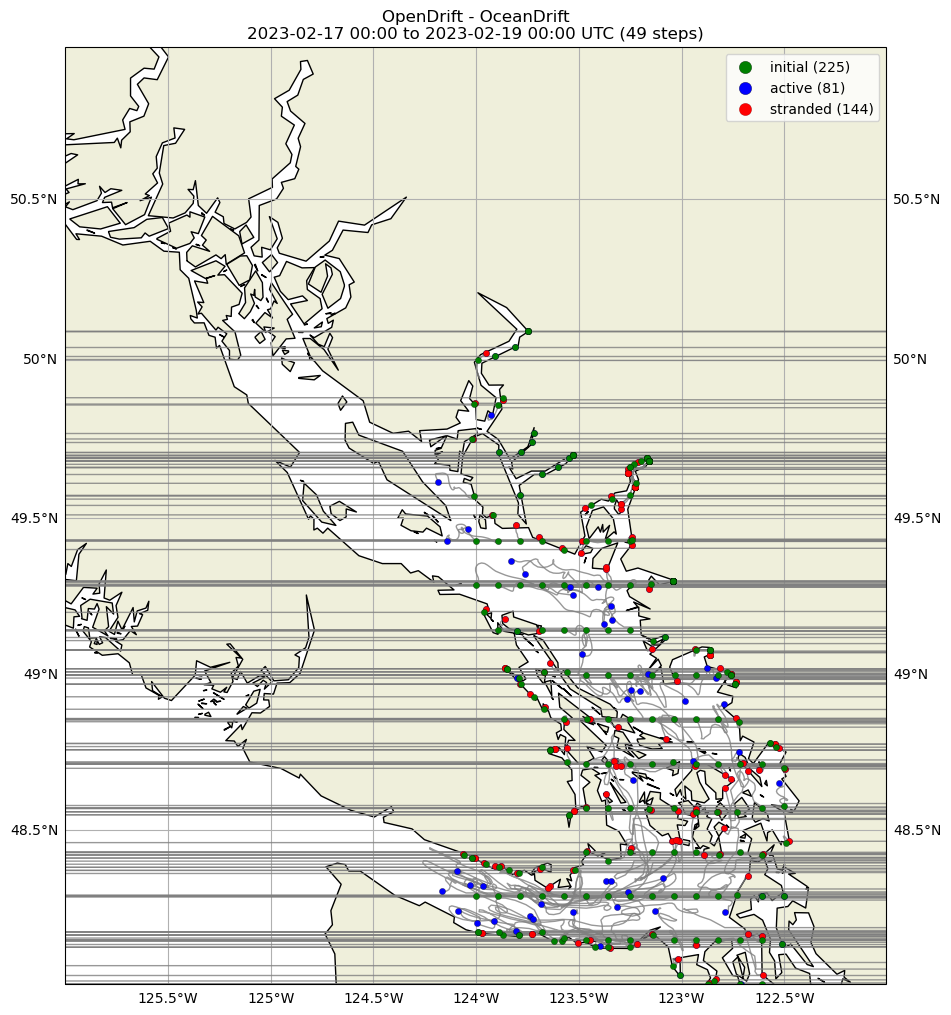

(<GeoAxes: title={'center': 'OpenDrift - OceanDrift\n2023-02-17 00:00 to 2023-02-19 00:00 UTC (49 steps)'}>,
 <Figure size 961.716x1100 with 1 Axes>)

In [11]:
o2.plot(corners=(reader.x[0],reader.x[-1],reader.y[0],reader.y[-1]))

# Lons -180 to 180 - repeat

In [12]:
lon_min=-124
lon_max=-122.5
lat_min=48
lat_max=50

lons = np.linspace(lon_min, lon_max, num=15)
lats = np.linspace(lat_min, lat_max, num=15)

lons, lats = np.meshgrid(lons, lats)

o3 = oceandrift.OceanDrift()
o3.add_reader(reader)
o3.seed_elements(lon=lons, lat=lats, time = reader.start_time)

o3.run(end_time=datetime.datetime(2023,2,19),outfile='lons180-newopendrift-repeat.nc')

11:48:16 DEBUG   opendrift.models.oceandrift:112: No machine learning correction available.
11:48:17 DEBUG   opendrift.models.basemodel:625: Adding 18 config items from basemodel
11:48:17 DEBUG   opendrift.models.basemodel:625: Adding 5 config items from basemodel
11:48:17 DEBUG   opendrift.models.basemodel:625: Adding 36 config items from basemodel
11:48:17 INFO    opendrift.models.basemodel:539: OpenDriftSimulation initialised (version 1.10.7 / v1.4.2-1580-gfab10c8)
11:48:17 DEBUG   opendrift.models.basemodel:625: Adding 14 config items from oceandrift
11:48:17 DEBUG   opendrift.models.basemodel:637:   Overwriting config item seed:z
11:48:17 DEBUG   opendrift.readers.basereader.variables:548: Setting buffer size 5 for reader /home/soontiensn/data/gpsc-jeh326/projects/stokes_drift/input_data/SalishSea/currents/*.nc, assuming a maximum average speed of 1 m/s and time span of 0:30:00
11:48:17 DEBUG   opendrift.models.basemodel:952: Added reader /home/soontiensn/data/gpsc-jeh326/projects

11:48:17 DEBUG   opendrift.models.basemodel:1231: Variable group ['x_sea_water_velocity', 'y_sea_water_velocity']
11:48:17 DEBUG   opendrift.models.basemodel:1232: ----------------------------------------
11:48:17 DEBUG   opendrift.models.basemodel:1236: Calling reader /home/soontiensn/data/gpsc-jeh326/projects/stokes_drift/input_data/SalishSea/currents/*.nc
11:48:17 DEBUG   opendrift.models.basemodel:1237: ----------------------------------------
11:48:17 DEBUG   opendrift.models.basemodel:1253: Data needed for 225 elements
11:48:17 DEBUG   opendrift.readers.basereader.variables:692: Fetching variables from /home/soontiensn/data/gpsc-jeh326/projects/stokes_drift/input_data/SalishSea/currents/*.nc
11:48:17 DEBUG   opendrift.readers.basereader.structured:178: Modulating longitudes to 0-360 for self.name
11:48:17 DEBUG   opendrift.readers.basereader.structured:184: Reader time:
		2023-02-17 00:00:00 (before)
		2023-02-17 00:30:00 (after)
11:48:17 DEBUG   opendrift.readers.reader_netCDF_C

11:48:17 DEBUG   opendrift.models.basemodel:1524:     land_binary_mask: 0 (min) 0 (max)
11:48:17 DEBUG   opendrift.models.basemodel:1526: ---------------------------------
11:48:17 DEBUG   opendrift.models.basemodel:1527: 		225 active elements
11:48:17 DEBUG   opendrift.models.basemodel:1538: 		47.98 <- latitude  -> 50.09
11:48:17 DEBUG   opendrift.models.basemodel:1543: 		-124.06 <- longitude -> -122.5
11:48:17 DEBUG   opendrift.models.basemodel:1546: 		z = 0.0
11:48:17 DEBUG   opendrift.models.basemodel:1549: ---------------------------------
11:48:17 DEBUG   opendrift.models.physics_methods:868: Calculating Hs from wind, min: 0.000000, mean: 0.000000, max: 0.000000
11:48:17 DEBUG   opendrift.models.physics_methods:926: Calculating wave period Tm02 from wind
11:48:17 DEBUG   opendrift.models.physics_methods:936:    min: 1.256637, mean: 1.256637, max: 1.256637
11:48:17 DEBUG   opendrift.models.physics_methods:876: Calculating wave period from wind, min: 1.256637, mean: 1.256637, max: 

11:48:17 DEBUG   opendrift.models.basemodel:1407:     Using fallback value 0 for y_sea_water_velocity for 32 elements
11:48:17 DEBUG   opendrift.models.basemodel:1414: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
11:48:17 DEBUG   opendrift.models.basemodel:1421:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
11:48:17 DEBUG   opendrift.models.basemodel:1522: ------------ SUMMARY -------------
11:48:17 DEBUG   opendrift.models.basemodel:1524:     x_sea_water_velocity: -1.75997 (min) 0.758168 (max)
11:48:17 DEBUG   opendrift.models.basemodel:1524:     y_sea_water_velocity: -1.24889 (min) 1.79226 (max)
11:48:17 DEBUG   opendrift.models.basemodel:1524:     x_wind: 0 (min) 0 (max)
11:48:17 DEBUG   opendrift.models.basemodel:1524:     y_wind: 0 (min) 0 (max)
11:48:17 DEBUG   opendrift.models.basemodel:1524:     upward_sea_water_velocity: 0 (min) 0 (max)
11:48:17 DEBUG   opendrift.models.basemodel:1524:     ocea

11:48:17 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 127 elements, expanding data 1
11:48:17 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 105 elements, expanding data 2
11:48:17 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 87 elements, expanding data 3
11:48:17 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 77 elements, expanding data 4
11:48:17 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 55 elements, expanding data 5
11:48:17 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 52 elements, expanding data 6
11:48:17 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 39 elements, expanding data 7
11:48:17 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 35 elements, expanding data 8
11:48:17 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 32 elements

11:48:17 DEBUG   opendrift.models.basemodel:1236: Calling reader /home/soontiensn/data/gpsc-jeh326/projects/stokes_drift/input_data/SalishSea/currents/*.nc
11:48:17 DEBUG   opendrift.models.basemodel:1237: ----------------------------------------
11:48:17 DEBUG   opendrift.models.basemodel:1253: Data needed for 189 elements
11:48:17 DEBUG   opendrift.readers.basereader.variables:692: Fetching variables from /home/soontiensn/data/gpsc-jeh326/projects/stokes_drift/input_data/SalishSea/currents/*.nc
11:48:17 DEBUG   opendrift.readers.basereader.structured:178: Modulating longitudes to 0-360 for self.name
11:48:17 DEBUG   opendrift.readers.basereader.structured:184: Reader time:
		2023-02-17 03:00:00 (before)
		2023-02-17 03:30:00 (after)
11:48:17 DEBUG   opendrift.readers.reader_netCDF_CF_generic:380: Using eastward_sea_water_velocity to retrieve x_sea_water_velocity
11:48:17 DEBUG   opendrift.readers.reader_netCDF_CF_generic:380: Using northward_sea_water_velocity to retrieve y_sea_water

11:48:17 DEBUG   opendrift.models.basemodel:1527: 		189 active elements
11:48:17 DEBUG   opendrift.models.basemodel:1538: 		47.979999542236335 <- latitude  -> 50.09000015258789
11:48:17 DEBUG   opendrift.models.basemodel:1543: 		-124.12840603272605 <- longitude -> -122.5
11:48:17 DEBUG   opendrift.models.basemodel:1546: 		z = 0.0
11:48:17 DEBUG   opendrift.models.basemodel:1549: ---------------------------------
11:48:17 DEBUG   opendrift.models.physics_methods:868: Calculating Hs from wind, min: 0.000000, mean: 0.000000, max: 0.000000
11:48:17 DEBUG   opendrift.models.physics_methods:926: Calculating wave period Tm02 from wind
11:48:17 DEBUG   opendrift.models.physics_methods:936:    min: 1.256637, mean: 1.256637, max: 1.256637
11:48:17 DEBUG   opendrift.models.physics_methods:876: Calculating wave period from wind, min: 1.256637, mean: 1.256637, max: 1.256637
11:48:17 DEBUG   opendrift.models.basemodel:2450: 4 elements scheduled for deactivation (stranded)
11:48:17 DEBUG   opendrift.

11:48:17 DEBUG   opendrift.models.basemodel:1384: Obtained data for all elements.
11:48:17 DEBUG   opendrift.models.basemodel:1397: ---------------------------------------
11:48:17 DEBUG   opendrift.models.basemodel:1398: Finished processing all variable groups
11:48:17 DEBUG   opendrift.models.basemodel:1407:     Using fallback value 0 for x_sea_water_velocity for 32 elements
11:48:17 DEBUG   opendrift.models.basemodel:1407:     Using fallback value 0 for y_sea_water_velocity for 32 elements
11:48:17 DEBUG   opendrift.models.basemodel:1414: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
11:48:17 DEBUG   opendrift.models.basemodel:1421:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
11:48:17 DEBUG   opendrift.models.basemodel:1522: ------------ SUMMARY -------------
11:48:17 DEBUG   opendrift.models.basemodel:1524:     x_sea_water_velocity: -0.846594 (min) 0.574429 (max)
11:48:17 DEBUG   opendrift.models.b

11:48:17 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 31 elements, expanding data 9
11:48:17 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 31 elements, expanding data 10
11:48:17 WARNING opendrift:133: Still NaN-values after 10 iterations, exiting!
11:48:17 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 101 elements, expanding data 1
11:48:17 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 78 elements, expanding data 2
11:48:17 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 53 elements, expanding data 3
11:48:17 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 45 elements, expanding data 4
11:48:17 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 35 elements, expanding data 5
11:48:17 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 35 elements, expanding data 6
11:48:17 DEBUG 

11:48:18 DEBUG   opendrift.models.basemodel:1230: ----------------------------------------
11:48:18 DEBUG   opendrift.models.basemodel:1231: Variable group ['x_sea_water_velocity', 'y_sea_water_velocity']
11:48:18 DEBUG   opendrift.models.basemodel:1232: ----------------------------------------
11:48:18 DEBUG   opendrift.models.basemodel:1236: Calling reader /home/soontiensn/data/gpsc-jeh326/projects/stokes_drift/input_data/SalishSea/currents/*.nc
11:48:18 DEBUG   opendrift.models.basemodel:1237: ----------------------------------------
11:48:18 DEBUG   opendrift.models.basemodel:1253: Data needed for 166 elements
11:48:18 DEBUG   opendrift.readers.basereader.variables:692: Fetching variables from /home/soontiensn/data/gpsc-jeh326/projects/stokes_drift/input_data/SalishSea/currents/*.nc
11:48:18 DEBUG   opendrift.readers.basereader.structured:178: Modulating longitudes to 0-360 for self.name
11:48:18 DEBUG   opendrift.readers.basereader.structured:184: Reader time:
		2023-02-17 06:00:0

11:48:18 DEBUG   opendrift.models.basemodel:1524:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
11:48:18 DEBUG   opendrift.models.basemodel:1524:     land_binary_mask: 0 (min) 1 (max)
11:48:18 DEBUG   opendrift.models.basemodel:1526: ---------------------------------
11:48:18 DEBUG   opendrift.models.basemodel:1527: 		166 active elements
11:48:18 DEBUG   opendrift.models.basemodel:1538: 		47.979999542236335 <- latitude  -> 50.09000015258789
11:48:18 DEBUG   opendrift.models.basemodel:1543: 		-124.14055981872882 <- longitude -> -122.5
11:48:18 DEBUG   opendrift.models.basemodel:1546: 		z = 0.0
11:48:18 DEBUG   opendrift.models.basemodel:1549: ---------------------------------
11:48:18 DEBUG   opendrift.models.physics_methods:868: Calculating Hs from wind, min: 0.000000, mean: 0.000000, max: 0.000000
11:48:18 DEBUG   opendrift.models.physics_methods:926: Calculating wave period Tm02 from wind
11:48:18 DEBUG   opendrift.models.physics_methods:936:    min: 1.256637, mean: 1.

11:48:18 DEBUG   opendrift.readers.basereader.continuous:37: Fetched env-before
11:48:18 DEBUG   opendrift.readers.basereader.variables:573: Checking land_binary_mask for invalid values
11:48:18 DEBUG   opendrift.readers.basereader.variables:728: Reader projection is latlon - rotation of vectors is not needed.
11:48:18 DEBUG   opendrift.models.basemodel:1384: Obtained data for all elements.
11:48:18 DEBUG   opendrift.models.basemodel:1397: ---------------------------------------
11:48:18 DEBUG   opendrift.models.basemodel:1398: Finished processing all variable groups
11:48:18 DEBUG   opendrift.models.basemodel:1407:     Using fallback value 0 for x_sea_water_velocity for 32 elements
11:48:18 DEBUG   opendrift.models.basemodel:1407:     Using fallback value 0 for y_sea_water_velocity for 32 elements
11:48:18 DEBUG   opendrift.models.basemodel:1414: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
11:48:18 DEBUG   opendrift.models.basemode

11:48:18 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 35 elements, expanding data 6
11:48:18 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 35 elements, expanding data 7
11:48:18 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 34 elements, expanding data 8
11:48:18 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 31 elements, expanding data 9
11:48:18 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 31 elements, expanding data 10
11:48:18 WARNING opendrift:133: Still NaN-values after 10 iterations, exiting!
11:48:18 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 86 elements, expanding data 1
11:48:18 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 56 elements, expanding data 2
11:48:18 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 50 elements, expanding data 3
11:48:18 DEBUG  

11:48:18 INFO    opendrift.models.basemodel:2882: 2023-02-17 09:00:00 - step 10 of 48 - 154 active elements (71 deactivated)
11:48:18 DEBUG   opendrift.models.basemodel:2888: 0 elements scheduled.
11:48:18 DEBUG   opendrift.models.basemodel:2890: ======================================================================
11:48:18 DEBUG   opendrift.models.basemodel:1230: ----------------------------------------
11:48:18 DEBUG   opendrift.models.basemodel:1231: Variable group ['x_sea_water_velocity', 'y_sea_water_velocity']
11:48:18 DEBUG   opendrift.models.basemodel:1232: ----------------------------------------
11:48:18 DEBUG   opendrift.models.basemodel:1236: Calling reader /home/soontiensn/data/gpsc-jeh326/projects/stokes_drift/input_data/SalishSea/currents/*.nc
11:48:18 DEBUG   opendrift.models.basemodel:1237: ----------------------------------------
11:48:18 DEBUG   opendrift.models.basemodel:1253: Data needed for 154 elements
11:48:18 DEBUG   opendrift.readers.basereader.variables:692:

11:48:18 DEBUG   opendrift.models.basemodel:1524:     surface_downward_y_stress: 0 (min) 0 (max)
11:48:18 DEBUG   opendrift.models.basemodel:1524:     turbulent_kinetic_energy: 0 (min) 0 (max)
11:48:18 DEBUG   opendrift.models.basemodel:1524:     turbulent_generic_length_scale: 0 (min) 0 (max)
11:48:18 DEBUG   opendrift.models.basemodel:1524:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
11:48:18 DEBUG   opendrift.models.basemodel:1524:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
11:48:18 DEBUG   opendrift.models.basemodel:1524:     land_binary_mask: 0 (min) 1 (max)
11:48:18 DEBUG   opendrift.models.basemodel:1526: ---------------------------------
11:48:18 DEBUG   opendrift.models.basemodel:1527: 		154 active elements
11:48:18 DEBUG   opendrift.models.basemodel:1538: 		47.979999542236335 <- latitude  -> 50.09000015258789
11:48:18 DEBUG   opendrift.models.basemodel:1543: 		-124.06452519911716 <- longitude -> -122.5
11:48:18 DEBUG   opendrift.models.basemodel:1546:

11:48:18 DEBUG   opendrift.models.basemodel:1232: ----------------------------------------
11:48:18 DEBUG   opendrift.models.basemodel:1236: Calling reader global_landmask
11:48:18 DEBUG   opendrift.models.basemodel:1237: ----------------------------------------
11:48:18 DEBUG   opendrift.models.basemodel:1253: Data needed for 149 elements
11:48:18 DEBUG   opendrift.readers.basereader.variables:692: Fetching variables from global_landmask
11:48:18 DEBUG   opendrift.readers.basereader.continuous:37: Fetched env-before
11:48:18 DEBUG   opendrift.readers.basereader.variables:573: Checking land_binary_mask for invalid values
11:48:18 DEBUG   opendrift.readers.basereader.variables:728: Reader projection is latlon - rotation of vectors is not needed.
11:48:18 DEBUG   opendrift.models.basemodel:1384: Obtained data for all elements.
11:48:18 DEBUG   opendrift.models.basemodel:1397: ---------------------------------------
11:48:18 DEBUG   opendrift.models.basemodel:1398: Finished processing all

11:48:18 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 53 elements, expanding data 2
11:48:18 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 46 elements, expanding data 3
11:48:18 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 38 elements, expanding data 4
11:48:18 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 37 elements, expanding data 5
11:48:18 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 36 elements, expanding data 6
11:48:18 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 36 elements, expanding data 7
11:48:18 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 34 elements, expanding data 8
11:48:18 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 31 elements, expanding data 9
11:48:18 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 31 elements, 

11:48:18 DEBUG   opendrift.models.oceandrift:366: No vertical advection for elements at surface
11:48:18 DEBUG   opendrift.models.basemodel:2420: Horizontal diffusivity is 0, no random walk.
11:48:18 DEBUG   opendrift.models.basemodel:2945: 138 active elements (87 deactivated)
11:48:18 DEBUG   opendrift.models.basemodel:1658: to be seeded: 0, already seeded 225
11:48:18 DEBUG   opendrift.models.basemodel:2881: ======================================================================
11:48:18 INFO    opendrift.models.basemodel:2882: 2023-02-17 12:00:00 - step 13 of 48 - 138 active elements (87 deactivated)
11:48:18 DEBUG   opendrift.models.basemodel:2888: 0 elements scheduled.
11:48:18 DEBUG   opendrift.models.basemodel:2890: ======================================================================
11:48:18 DEBUG   opendrift.models.basemodel:1230: ----------------------------------------
11:48:18 DEBUG   opendrift.models.basemodel:1231: Variable group ['x_sea_water_velocity', 'y_sea_water_vel

11:48:18 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
11:48:18 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
11:48:19 DEBUG   opendrift.models.basemodel:1524:     surface_downward_x_stress: 0 (min) 0 (max)
11:48:19 DEBUG   opendrift.models.basemodel:1524:     surface_downward_y_stress: 0 (min) 0 (max)
11:48:19 DEBUG   opendrift.models.basemodel:1524:     turbulent_kinetic_energy: 0 (min) 0 (max)
11:48:19 DEBUG   opendrift.models.basemodel:1524:     turbulent_generic_length_scale: 0 (min) 0 (max)
11:48:19 DEBUG   opendrift.models.basemodel:1524:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
11:48:19 DEBUG   opendrift.models.basemodel:1524:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
11:48:19 DEBUG   opendrift.models.basemodel:1524:     land_binary_mask: 0 (min) 1 (max)
11:48:19 DEBUG   open

11:48:19 DEBUG   opendrift.readers.basereader.variables:769: Masking 2 elements outside coverage
11:48:19 DEBUG   opendrift.models.basemodel:1387: Data missing for 32 elements.
11:48:19 DEBUG   opendrift.models.basemodel:1230: ----------------------------------------
11:48:19 DEBUG   opendrift.models.basemodel:1231: Variable group ['land_binary_mask']
11:48:19 DEBUG   opendrift.models.basemodel:1232: ----------------------------------------
11:48:19 DEBUG   opendrift.models.basemodel:1236: Calling reader global_landmask
11:48:19 DEBUG   opendrift.models.basemodel:1237: ----------------------------------------
11:48:19 DEBUG   opendrift.models.basemodel:1253: Data needed for 136 elements
11:48:19 DEBUG   opendrift.readers.basereader.variables:692: Fetching variables from global_landmask
11:48:19 DEBUG   opendrift.readers.basereader.continuous:37: Fetched env-before
11:48:19 DEBUG   opendrift.readers.basereader.variables:573: Checking land_binary_mask for invalid values
11:48:19 DEBUG   

11:48:19 DEBUG   opendrift.readers.basereader.structured:296: Interpolating before (2023-02-17 14:00:00) in space  (linearNDFast)
11:48:19 DEBUG   opendrift.readers.interpolation.structured:80: Initialising interpolator.
11:48:19 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 70 elements, expanding data 1
11:48:19 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 46 elements, expanding data 2
11:48:19 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 44 elements, expanding data 3
11:48:19 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 35 elements, expanding data 4
11:48:19 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 34 elements, expanding data 5
11:48:19 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 33 elements, expanding data 6
11:48:19 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 33 elements, expan

11:48:19 DEBUG   opendrift.models.basemodel:2482: Removed 3 values from environment_profiles.
11:48:19 DEBUG   opendrift.models.basemodel:2930: Calling OceanDrift.update()
11:48:19 DEBUG   opendrift.models.physics_methods:727: No wind for wind-sheared ocean drift
11:48:19 DEBUG   opendrift.models.physics_methods:755: No Stokes drift velocity available
11:48:19 DEBUG   opendrift.models.oceandrift:366: No vertical advection for elements at surface
11:48:19 DEBUG   opendrift.models.basemodel:2420: Horizontal diffusivity is 0, no random walk.
11:48:19 DEBUG   opendrift.models.basemodel:2945: 129 active elements (96 deactivated)
11:48:19 DEBUG   opendrift.models.basemodel:1658: to be seeded: 0, already seeded 225
11:48:19 DEBUG   opendrift.models.basemodel:2881: ======================================================================
11:48:19 INFO    opendrift.models.basemodel:2882: 2023-02-17 15:00:00 - step 16 of 48 - 129 active elements (96 deactivated)
11:48:19 DEBUG   opendrift.models.ba

11:48:19 DEBUG   opendrift.models.basemodel:1524:     ocean_vertical_diffusivity: 0 (min) 0 (max)
11:48:19 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_significant_height: 0 (min) 0 (max)
11:48:19 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
11:48:19 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
11:48:19 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
11:48:19 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
11:48:19 DEBUG   opendrift.models.basemodel:1524:     surface_downward_x_stress: 0 (min) 0 (max)
11:48:19 DEBUG   opendrift.models.basemodel:1524:     surface_downward_y_stress: 0 (min) 0 (max)
11:48:19 DEBUG   opendrift.models.basemodel:1524:     turbulent_kinetic_energy: 0 (min) 0 

11:48:19 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 31 elements, expanding data 10
11:48:19 WARNING opendrift:133: Still NaN-values after 10 iterations, exiting!
11:48:19 DEBUG   opendrift.readers.basereader.structured:350: No time interpolation needed - right on time.
11:48:19 DEBUG   opendrift.readers.basereader.variables:728: Reader projection is latlon - rotation of vectors is not needed.
11:48:19 DEBUG   opendrift.readers.basereader.variables:769: Masking 2 elements outside coverage
11:48:19 DEBUG   opendrift.models.basemodel:1387: Data missing for 32 elements.
11:48:19 DEBUG   opendrift.models.basemodel:1230: ----------------------------------------
11:48:19 DEBUG   opendrift.models.basemodel:1231: Variable group ['land_binary_mask']
11:48:19 DEBUG   opendrift.models.basemodel:1232: ----------------------------------------
11:48:19 DEBUG   opendrift.models.basemodel:1236: Calling reader global_landmask
11:48:19 DEBUG   opendrift.models.basemodel:123

11:48:19 DEBUG   opendrift.readers.interpolation.structured:80: Initialising interpolator.
11:48:19 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 52 elements, expanding data 1
11:48:19 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 47 elements, expanding data 2
11:48:19 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 44 elements, expanding data 3
11:48:19 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 35 elements, expanding data 4
11:48:19 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 33 elements, expanding data 5
11:48:19 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 33 elements, expanding data 6
11:48:19 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 32 elements, expanding data 7
11:48:19 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 31 elements, expanding data 8
11:48

11:48:19 DEBUG   opendrift.models.physics_methods:727: No wind for wind-sheared ocean drift
11:48:19 DEBUG   opendrift.models.physics_methods:755: No Stokes drift velocity available
11:48:19 DEBUG   opendrift.models.oceandrift:366: No vertical advection for elements at surface
11:48:19 DEBUG   opendrift.models.basemodel:2420: Horizontal diffusivity is 0, no random walk.
11:48:19 DEBUG   opendrift.models.basemodel:2945: 127 active elements (98 deactivated)
11:48:19 DEBUG   opendrift.models.basemodel:1658: to be seeded: 0, already seeded 225
11:48:19 DEBUG   opendrift.models.basemodel:2881: ======================================================================
11:48:19 INFO    opendrift.models.basemodel:2882: 2023-02-17 18:00:00 - step 19 of 48 - 127 active elements (98 deactivated)
11:48:19 DEBUG   opendrift.models.basemodel:2888: 0 elements scheduled.
11:48:19 DEBUG   opendrift.models.basemodel:2890: ======================================================================
11:48:19 DEBUG 

11:48:19 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
11:48:19 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
11:48:19 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
11:48:19 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
11:48:19 DEBUG   opendrift.models.basemodel:1524:     surface_downward_x_stress: 0 (min) 0 (max)
11:48:19 DEBUG   opendrift.models.basemodel:1524:     surface_downward_y_stress: 0 (min) 0 (max)
11:48:19 DEBUG   opendrift.models.basemodel:1524:     turbulent_kinetic_energy: 0 (min) 0 (max)
11:48:19 DEBUG   opendrift.models.basemodel:1524:     turbulent_generic_length_scale: 0 (min) 0 (max)
11:48:19 DEBUG   opendrift.models.basemodel:1524:     ocean_mixed_layer_thickness: 50 (min) 50 (m

11:48:19 DEBUG   opendrift.readers.basereader.structured:350: No time interpolation needed - right on time.
11:48:19 DEBUG   opendrift.readers.basereader.variables:728: Reader projection is latlon - rotation of vectors is not needed.
11:48:19 DEBUG   opendrift.readers.basereader.variables:769: Masking 2 elements outside coverage
11:48:19 DEBUG   opendrift.models.basemodel:1387: Data missing for 32 elements.
11:48:19 DEBUG   opendrift.models.basemodel:1230: ----------------------------------------
11:48:19 DEBUG   opendrift.models.basemodel:1231: Variable group ['land_binary_mask']
11:48:19 DEBUG   opendrift.models.basemodel:1232: ----------------------------------------
11:48:19 DEBUG   opendrift.models.basemodel:1236: Calling reader global_landmask
11:48:19 DEBUG   opendrift.models.basemodel:1237: ----------------------------------------
11:48:19 DEBUG   opendrift.models.basemodel:1253: Data needed for 123 elements
11:48:19 DEBUG   opendrift.readers.basereader.variables:692: Fetching 

11:48:20 DEBUG   opendrift.readers.basereader.variables:573: Checking y_sea_water_velocity for invalid values
11:48:20 DEBUG   opendrift.readers.basereader.structured:253: Fetched env-block (size 240x468x1) for time before (2023-02-17 20:00:00)
11:48:20 DEBUG   opendrift.readers.basereader.structured:296: Interpolating before (2023-02-17 20:00:00) in space  (linearNDFast)
11:48:20 DEBUG   opendrift.readers.interpolation.structured:80: Initialising interpolator.
11:48:20 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 45 elements, expanding data 1
11:48:20 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 38 elements, expanding data 2
11:48:20 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 35 elements, expanding data 3
11:48:20 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 34 elements, expanding data 4
11:48:20 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for

11:48:20 DEBUG   opendrift.models.basemodel:2478: remove items from profile for z
11:48:20 DEBUG   opendrift.models.basemodel:2478: remove items from profile for ocean_vertical_diffusivity
11:48:20 DEBUG   opendrift.models.basemodel:2482: Removed 2 values from environment_profiles.
11:48:20 DEBUG   opendrift.models.basemodel:2930: Calling OceanDrift.update()
11:48:20 DEBUG   opendrift.models.physics_methods:727: No wind for wind-sheared ocean drift
11:48:20 DEBUG   opendrift.models.physics_methods:755: No Stokes drift velocity available
11:48:20 DEBUG   opendrift.models.oceandrift:366: No vertical advection for elements at surface
11:48:20 DEBUG   opendrift.models.basemodel:2420: Horizontal diffusivity is 0, no random walk.
11:48:20 DEBUG   opendrift.models.basemodel:2945: 113 active elements (112 deactivated)
11:48:20 DEBUG   opendrift.models.basemodel:1658: to be seeded: 0, already seeded 225
11:48:20 DEBUG   opendrift.models.basemodel:2881: ==========================================

11:48:20 DEBUG   opendrift.models.basemodel:1524:     y_wind: 0 (min) 0 (max)
11:48:20 DEBUG   opendrift.models.basemodel:1524:     upward_sea_water_velocity: 0 (min) 0 (max)
11:48:20 DEBUG   opendrift.models.basemodel:1524:     ocean_vertical_diffusivity: 0 (min) 0 (max)
11:48:20 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_significant_height: 0 (min) 0 (max)
11:48:20 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
11:48:20 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
11:48:20 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
11:48:20 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
11:48:20 DEBUG   opendrift.models.basemodel:1524:     surface_downward_x_stress: 0 (min) 0 (max)
11:48:20 DEB

11:48:20 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 31 elements, expanding data 8
11:48:20 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 31 elements, expanding data 9
11:48:20 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 31 elements, expanding data 10
11:48:20 WARNING opendrift:133: Still NaN-values after 10 iterations, exiting!
11:48:20 DEBUG   opendrift.readers.basereader.structured:350: No time interpolation needed - right on time.
11:48:20 DEBUG   opendrift.readers.basereader.variables:728: Reader projection is latlon - rotation of vectors is not needed.
11:48:20 DEBUG   opendrift.readers.basereader.variables:769: Masking 2 elements outside coverage
11:48:20 DEBUG   opendrift.models.basemodel:1387: Data missing for 32 elements.
11:48:20 DEBUG   opendrift.models.basemodel:1230: ----------------------------------------
11:48:20 DEBUG   opendrift.models.basemodel:1231: Variable group ['land_binary_

11:48:20 DEBUG   opendrift.readers.reader_netCDF_CF_generic:380: Using northward_sea_water_velocity to retrieve y_sea_water_velocity
11:48:20 DEBUG   opendrift.readers.reader_netCDF_CF_generic:464: North is up, no rotation necessary
11:48:20 DEBUG   opendrift.readers.basereader.variables:573: Checking x_sea_water_velocity for invalid values
11:48:20 DEBUG   opendrift.readers.basereader.variables:573: Checking y_sea_water_velocity for invalid values
11:48:20 DEBUG   opendrift.readers.basereader.structured:253: Fetched env-block (size 241x468x1) for time before (2023-02-17 23:00:00)
11:48:20 DEBUG   opendrift.readers.basereader.structured:296: Interpolating before (2023-02-17 23:00:00) in space  (linearNDFast)
11:48:20 DEBUG   opendrift.readers.interpolation.structured:80: Initialising interpolator.
11:48:20 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 41 elements, expanding data 1
11:48:20 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values

11:48:20 DEBUG   opendrift.models.basemodel:2450: 3 elements scheduled for deactivation (stranded)
11:48:20 DEBUG   opendrift.models.basemodel:2452: 	(z: 0.000000 to 0.000000)
11:48:20 DEBUG   opendrift.models.basemodel:2470: Removed 3 elements.
11:48:20 DEBUG   opendrift.models.basemodel:2473: Removed 3 values from environment.
11:48:20 DEBUG   opendrift.models.basemodel:2478: remove items from profile for z
11:48:20 DEBUG   opendrift.models.basemodel:2478: remove items from profile for ocean_vertical_diffusivity
11:48:20 DEBUG   opendrift.models.basemodel:2482: Removed 3 values from environment_profiles.
11:48:20 DEBUG   opendrift.models.basemodel:2930: Calling OceanDrift.update()
11:48:20 DEBUG   opendrift.models.physics_methods:727: No wind for wind-sheared ocean drift
11:48:20 DEBUG   opendrift.models.physics_methods:755: No Stokes drift velocity available
11:48:20 DEBUG   opendrift.models.oceandrift:366: No vertical advection for elements at surface
11:48:20 DEBUG   opendrift.mod

11:48:20 DEBUG   opendrift.models.basemodel:1522: ------------ SUMMARY -------------
11:48:20 DEBUG   opendrift.models.basemodel:1524:     x_sea_water_velocity: -1.48513 (min) 0.614231 (max)
11:48:20 DEBUG   opendrift.models.basemodel:1524:     y_sea_water_velocity: -1.40102 (min) 0.52652 (max)
11:48:20 DEBUG   opendrift.models.basemodel:1524:     x_wind: 0 (min) 0 (max)
11:48:20 DEBUG   opendrift.models.basemodel:1524:     y_wind: 0 (min) 0 (max)
11:48:20 DEBUG   opendrift.models.basemodel:1524:     upward_sea_water_velocity: 0 (min) 0 (max)
11:48:20 DEBUG   opendrift.models.basemodel:1524:     ocean_vertical_diffusivity: 0 (min) 0 (max)
11:48:20 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_significant_height: 0 (min) 0 (max)
11:48:20 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
11:48:20 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
11:48:20 DEBUG   opend

11:48:20 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 31 elements, expanding data 10
11:48:20 WARNING opendrift:133: Still NaN-values after 10 iterations, exiting!
11:48:20 DEBUG   opendrift.readers.basereader.structured:350: No time interpolation needed - right on time.
11:48:20 DEBUG   opendrift.readers.basereader.variables:728: Reader projection is latlon - rotation of vectors is not needed.
11:48:20 DEBUG   opendrift.readers.basereader.variables:769: Masking 2 elements outside coverage
11:48:20 DEBUG   opendrift.models.basemodel:1387: Data missing for 32 elements.
11:48:20 DEBUG   opendrift.models.basemodel:1230: ----------------------------------------
11:48:20 DEBUG   opendrift.models.basemodel:1231: Variable group ['land_binary_mask']
11:48:20 DEBUG   opendrift.models.basemodel:1232: ----------------------------------------
11:48:20 DEBUG   opendrift.models.basemodel:1236: Calling reader global_landmask
11:48:20 DEBUG   opendrift.models.basemodel:123

11:48:20 DEBUG   opendrift.readers.interpolation.structured:80: Initialising interpolator.
11:48:20 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 55 elements, expanding data 1
11:48:20 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 35 elements, expanding data 2
11:48:20 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 33 elements, expanding data 3
11:48:20 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 32 elements, expanding data 4
11:48:20 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 32 elements, expanding data 5
11:48:20 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 32 elements, expanding data 6
11:48:20 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 32 elements, expanding data 7
11:48:20 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 31 elements, expanding data 8
11:48

11:48:21 DEBUG   opendrift.models.physics_methods:727: No wind for wind-sheared ocean drift
11:48:21 DEBUG   opendrift.models.physics_methods:755: No Stokes drift velocity available
11:48:21 DEBUG   opendrift.models.oceandrift:366: No vertical advection for elements at surface
11:48:21 DEBUG   opendrift.models.basemodel:2420: Horizontal diffusivity is 0, no random walk.
11:48:21 DEBUG   opendrift.models.basemodel:2945: 87 active elements (138 deactivated)
11:48:21 DEBUG   opendrift.models.basemodel:1658: to be seeded: 0, already seeded 225
11:48:21 DEBUG   opendrift.models.basemodel:2881: ======================================================================
11:48:21 INFO    opendrift.models.basemodel:2882: 2023-02-18 03:00:00 - step 28 of 48 - 87 active elements (138 deactivated)
11:48:21 DEBUG   opendrift.models.basemodel:2888: 0 elements scheduled.
11:48:21 DEBUG   opendrift.models.basemodel:2890: ======================================================================
11:48:21 DEBUG 

11:48:21 DEBUG   opendrift.models.basemodel:1524:     upward_sea_water_velocity: 0 (min) 0 (max)
11:48:21 DEBUG   opendrift.models.basemodel:1524:     ocean_vertical_diffusivity: 0 (min) 0 (max)
11:48:21 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_significant_height: 0 (min) 0 (max)
11:48:21 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
11:48:21 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
11:48:21 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
11:48:21 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
11:48:21 DEBUG   opendrift.models.basemodel:1524:     surface_downward_x_stress: 0 (min) 0 (max)
11:48:21 DEBUG   opendrift.models.basemodel:1524:     surface_downward_y_stress: 0 (min) 0

11:48:21 DEBUG   opendrift.readers.basereader.variables:769: Masking 2 elements outside coverage
11:48:21 DEBUG   opendrift.models.basemodel:1387: Data missing for 32 elements.
11:48:21 DEBUG   opendrift.models.basemodel:1230: ----------------------------------------
11:48:21 DEBUG   opendrift.models.basemodel:1231: Variable group ['land_binary_mask']
11:48:21 DEBUG   opendrift.models.basemodel:1232: ----------------------------------------
11:48:21 DEBUG   opendrift.models.basemodel:1236: Calling reader global_landmask
11:48:21 DEBUG   opendrift.models.basemodel:1237: ----------------------------------------
11:48:21 DEBUG   opendrift.models.basemodel:1253: Data needed for 87 elements
11:48:21 DEBUG   opendrift.readers.basereader.variables:692: Fetching variables from global_landmask
11:48:21 DEBUG   opendrift.readers.basereader.continuous:37: Fetched env-before
11:48:21 DEBUG   opendrift.readers.basereader.variables:573: Checking land_binary_mask for invalid values
11:48:21 DEBUG   o

11:48:21 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 32 elements, expanding data 4
11:48:21 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 32 elements, expanding data 5
11:48:21 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 32 elements, expanding data 6
11:48:21 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 32 elements, expanding data 7
11:48:21 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 31 elements, expanding data 8
11:48:21 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 31 elements, expanding data 9
11:48:21 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 31 elements, expanding data 10
11:48:21 WARNING opendrift:133: Still NaN-values after 10 iterations, exiting!
11:48:21 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 39 elements, expanding data 1
11:48:21 DEBUG  

11:48:21 DEBUG   opendrift.models.basemodel:1230: ----------------------------------------
11:48:21 DEBUG   opendrift.models.basemodel:1231: Variable group ['x_sea_water_velocity', 'y_sea_water_velocity']
11:48:21 DEBUG   opendrift.models.basemodel:1232: ----------------------------------------
11:48:21 DEBUG   opendrift.models.basemodel:1236: Calling reader /home/soontiensn/data/gpsc-jeh326/projects/stokes_drift/input_data/SalishSea/currents/*.nc
11:48:21 DEBUG   opendrift.models.basemodel:1237: ----------------------------------------
11:48:21 DEBUG   opendrift.models.basemodel:1253: Data needed for 87 elements
11:48:21 DEBUG   opendrift.readers.basereader.variables:692: Fetching variables from /home/soontiensn/data/gpsc-jeh326/projects/stokes_drift/input_data/SalishSea/currents/*.nc
11:48:21 DEBUG   opendrift.readers.basereader.structured:178: Modulating longitudes to 0-360 for self.name
11:48:21 DEBUG   opendrift.readers.basereader.structured:184: Reader time:
		2023-02-18 06:00:00

11:48:21 DEBUG   opendrift.models.basemodel:1524:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
11:48:21 DEBUG   opendrift.models.basemodel:1524:     land_binary_mask: 0 (min) 0 (max)
11:48:21 DEBUG   opendrift.models.basemodel:1526: ---------------------------------
11:48:21 DEBUG   opendrift.models.basemodel:1527: 		87 active elements
11:48:21 DEBUG   opendrift.models.basemodel:1538: 		47.979999542236335 <- latitude  -> 50.09000015258789
11:48:21 DEBUG   opendrift.models.basemodel:1543: 		-124.25684915386243 <- longitude -> -122.5
11:48:21 DEBUG   opendrift.models.basemodel:1546: 		z = 0.0
11:48:21 DEBUG   opendrift.models.basemodel:1549: ---------------------------------
11:48:21 DEBUG   opendrift.models.physics_methods:868: Calculating Hs from wind, min: 0.000000, mean: 0.000000, max: 0.000000
11:48:21 DEBUG   opendrift.models.physics_methods:926: Calculating wave period Tm02 from wind
11:48:21 DEBUG   opendrift.models.physics_methods:936:    min: 1.256637, mean: 1.2

11:48:21 DEBUG   opendrift.models.basemodel:1398: Finished processing all variable groups
11:48:21 DEBUG   opendrift.models.basemodel:1407:     Using fallback value 0 for x_sea_water_velocity for 32 elements
11:48:21 DEBUG   opendrift.models.basemodel:1407:     Using fallback value 0 for y_sea_water_velocity for 32 elements
11:48:21 DEBUG   opendrift.models.basemodel:1414: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
11:48:21 DEBUG   opendrift.models.basemodel:1421:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
11:48:21 DEBUG   opendrift.models.basemodel:1522: ------------ SUMMARY -------------
11:48:21 DEBUG   opendrift.models.basemodel:1524:     x_sea_water_velocity: -0.508928 (min) 0.84105 (max)
11:48:21 DEBUG   opendrift.models.basemodel:1524:     y_sea_water_velocity: -0.406764 (min) 1.11645 (max)
11:48:21 DEBUG   opendrift.models.basemodel:1524:     x_wind: 0 (min) 0 (max)
11:48:21 DEBUG   opendri

11:48:21 WARNING opendrift:133: Still NaN-values after 10 iterations, exiting!
11:48:21 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 38 elements, expanding data 1
11:48:21 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 37 elements, expanding data 2
11:48:21 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 35 elements, expanding data 3
11:48:21 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 33 elements, expanding data 4
11:48:21 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 32 elements, expanding data 5
11:48:21 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 32 elements, expanding data 6
11:48:21 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 32 elements, expanding data 7
11:48:21 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 31 elements, expanding data 8
11:48:21 DEBUG   

11:48:21 DEBUG   opendrift.readers.basereader.structured:178: Modulating longitudes to 0-360 for self.name
11:48:21 DEBUG   opendrift.readers.basereader.structured:184: Reader time:
		2023-02-18 09:00:00 (before)
		2023-02-18 09:30:00 (after)
11:48:21 DEBUG   opendrift.readers.reader_netCDF_CF_generic:380: Using eastward_sea_water_velocity to retrieve x_sea_water_velocity
11:48:21 DEBUG   opendrift.readers.reader_netCDF_CF_generic:380: Using northward_sea_water_velocity to retrieve y_sea_water_velocity
11:48:21 DEBUG   opendrift.readers.reader_netCDF_CF_generic:464: North is up, no rotation necessary
11:48:21 DEBUG   opendrift.readers.basereader.variables:573: Checking x_sea_water_velocity for invalid values
11:48:21 DEBUG   opendrift.readers.basereader.variables:573: Checking y_sea_water_velocity for invalid values
11:48:21 DEBUG   opendrift.readers.basereader.structured:253: Fetched env-block (size 256x468x1) for time before (2023-02-18 09:00:00)
11:48:21 DEBUG   opendrift.readers.ba

11:48:22 DEBUG   opendrift.models.physics_methods:926: Calculating wave period Tm02 from wind
11:48:22 DEBUG   opendrift.models.physics_methods:936:    min: 1.256637, mean: 1.256637, max: 1.256637
11:48:22 DEBUG   opendrift.models.physics_methods:876: Calculating wave period from wind, min: 1.256637, mean: 1.256637, max: 1.256637
11:48:22 DEBUG   opendrift.models.basemodel:2466: No elements to deactivate
11:48:22 DEBUG   opendrift.models.basemodel:2930: Calling OceanDrift.update()
11:48:22 DEBUG   opendrift.models.physics_methods:727: No wind for wind-sheared ocean drift
11:48:22 DEBUG   opendrift.models.physics_methods:755: No Stokes drift velocity available
11:48:22 DEBUG   opendrift.models.oceandrift:366: No vertical advection for elements at surface
11:48:22 DEBUG   opendrift.models.basemodel:2420: Horizontal diffusivity is 0, no random walk.
11:48:22 DEBUG   opendrift.models.basemodel:2945: 86 active elements (139 deactivated)
11:48:22 DEBUG   opendrift.models.basemodel:1658: to b

11:48:22 DEBUG   opendrift.models.basemodel:1524:     x_wind: 0 (min) 0 (max)
11:48:22 DEBUG   opendrift.models.basemodel:1524:     y_wind: 0 (min) 0 (max)
11:48:22 DEBUG   opendrift.models.basemodel:1524:     upward_sea_water_velocity: 0 (min) 0 (max)
11:48:22 DEBUG   opendrift.models.basemodel:1524:     ocean_vertical_diffusivity: 0 (min) 0 (max)
11:48:22 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_significant_height: 0 (min) 0 (max)
11:48:22 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
11:48:22 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
11:48:22 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
11:48:22 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
11:48:22 DEBUG   opendrift.mode

11:48:22 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 31 elements, expanding data 8
11:48:22 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 31 elements, expanding data 9
11:48:22 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 31 elements, expanding data 10
11:48:22 WARNING opendrift:133: Still NaN-values after 10 iterations, exiting!
11:48:22 DEBUG   opendrift.readers.basereader.structured:350: No time interpolation needed - right on time.
11:48:22 DEBUG   opendrift.readers.basereader.variables:728: Reader projection is latlon - rotation of vectors is not needed.
11:48:22 DEBUG   opendrift.readers.basereader.variables:769: Masking 2 elements outside coverage
11:48:22 DEBUG   opendrift.models.basemodel:1387: Data missing for 32 elements.
11:48:22 DEBUG   opendrift.models.basemodel:1230: ----------------------------------------
11:48:22 DEBUG   opendrift.models.basemodel:1231: Variable group ['land_binary_

11:48:22 DEBUG   opendrift.readers.basereader.structured:253: Fetched env-block (size 248x468x1) for time before (2023-02-18 12:00:00)
11:48:22 DEBUG   opendrift.readers.basereader.structured:296: Interpolating before (2023-02-18 12:00:00) in space  (linearNDFast)
11:48:22 DEBUG   opendrift.readers.interpolation.structured:80: Initialising interpolator.
11:48:22 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 40 elements, expanding data 1
11:48:22 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 37 elements, expanding data 2
11:48:22 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 34 elements, expanding data 3
11:48:22 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 33 elements, expanding data 4
11:48:22 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 33 elements, expanding data 5
11:48:22 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values 

11:48:22 DEBUG   opendrift.models.basemodel:2478: remove items from profile for ocean_vertical_diffusivity
11:48:22 DEBUG   opendrift.models.basemodel:2482: Removed 2 values from environment_profiles.
11:48:22 DEBUG   opendrift.models.basemodel:2930: Calling OceanDrift.update()
11:48:22 DEBUG   opendrift.models.physics_methods:727: No wind for wind-sheared ocean drift
11:48:22 DEBUG   opendrift.models.physics_methods:755: No Stokes drift velocity available
11:48:22 DEBUG   opendrift.models.oceandrift:366: No vertical advection for elements at surface
11:48:22 DEBUG   opendrift.models.basemodel:2420: Horizontal diffusivity is 0, no random walk.
11:48:22 DEBUG   opendrift.models.basemodel:2945: 83 active elements (142 deactivated)
11:48:22 DEBUG   opendrift.models.basemodel:1658: to be seeded: 0, already seeded 225
11:48:22 DEBUG   opendrift.models.basemodel:2881: ======================================================================
11:48:22 INFO    opendrift.models.basemodel:2882: 2023

11:48:22 DEBUG   opendrift.models.basemodel:1524:     upward_sea_water_velocity: 0 (min) 0 (max)
11:48:22 DEBUG   opendrift.models.basemodel:1524:     ocean_vertical_diffusivity: 0 (min) 0 (max)
11:48:22 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_significant_height: 0 (min) 0 (max)
11:48:22 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
11:48:22 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
11:48:22 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
11:48:22 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
11:48:22 DEBUG   opendrift.models.basemodel:1524:     surface_downward_x_stress: 0 (min) 0 (max)
11:48:22 DEBUG   opendrift.models.basemodel:1524:     surface_downward_y_stress: 0 (min) 0

11:48:22 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 31 elements, expanding data 9
11:48:22 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 31 elements, expanding data 10
11:48:22 WARNING opendrift:133: Still NaN-values after 10 iterations, exiting!
11:48:22 DEBUG   opendrift.readers.basereader.structured:350: No time interpolation needed - right on time.
11:48:22 DEBUG   opendrift.readers.basereader.variables:728: Reader projection is latlon - rotation of vectors is not needed.
11:48:22 DEBUG   opendrift.readers.basereader.variables:769: Masking 2 elements outside coverage
11:48:22 DEBUG   opendrift.models.basemodel:1387: Data missing for 32 elements.
11:48:22 DEBUG   opendrift.models.basemodel:1230: ----------------------------------------
11:48:22 DEBUG   opendrift.models.basemodel:1231: Variable group ['land_binary_mask']
11:48:22 DEBUG   opendrift.models.basemodel:1232: ----------------------------------------
11:48:22 DEBUG 

11:48:22 DEBUG   opendrift.readers.basereader.structured:296: Interpolating before (2023-02-18 15:00:00) in space  (linearNDFast)
11:48:22 DEBUG   opendrift.readers.interpolation.structured:80: Initialising interpolator.
11:48:22 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 40 elements, expanding data 1
11:48:22 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 37 elements, expanding data 2
11:48:22 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 33 elements, expanding data 3
11:48:22 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 32 elements, expanding data 4
11:48:22 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 32 elements, expanding data 5
11:48:22 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 32 elements, expanding data 6
11:48:22 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 32 elements, expan

11:48:22 DEBUG   opendrift.models.basemodel:2945: 82 active elements (143 deactivated)
11:48:22 DEBUG   opendrift.models.basemodel:1658: to be seeded: 0, already seeded 225
11:48:22 DEBUG   opendrift.models.basemodel:2881: ======================================================================
11:48:22 INFO    opendrift.models.basemodel:2882: 2023-02-18 16:00:00 - step 41 of 48 - 82 active elements (143 deactivated)
11:48:22 DEBUG   opendrift.models.basemodel:2888: 0 elements scheduled.
11:48:22 DEBUG   opendrift.models.basemodel:2890: ======================================================================
11:48:22 DEBUG   opendrift.models.basemodel:1230: ----------------------------------------
11:48:22 DEBUG   opendrift.models.basemodel:1231: Variable group ['x_sea_water_velocity', 'y_sea_water_velocity']
11:48:22 DEBUG   opendrift.models.basemodel:1232: ----------------------------------------
11:48:22 DEBUG   opendrift.models.basemodel:1236: Calling reader /home/soontiensn/data/gpsc-

11:48:22 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
11:48:22 DEBUG   opendrift.models.basemodel:1524:     surface_downward_x_stress: 0 (min) 0 (max)
11:48:22 DEBUG   opendrift.models.basemodel:1524:     surface_downward_y_stress: 0 (min) 0 (max)
11:48:22 DEBUG   opendrift.models.basemodel:1524:     turbulent_kinetic_energy: 0 (min) 0 (max)
11:48:22 DEBUG   opendrift.models.basemodel:1524:     turbulent_generic_length_scale: 0 (min) 0 (max)
11:48:22 DEBUG   opendrift.models.basemodel:1524:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
11:48:22 DEBUG   opendrift.models.basemodel:1524:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
11:48:22 DEBUG   opendrift.models.basemodel:1524:     land_binary_mask: 0 (min) 0 (max)
11:48:22 DEBUG   opendrift.models.basemodel:1526: ---------------------------------
11:48:22 DEBUG   opendrift.models.basemodel:1527: 		82 active element

11:48:23 DEBUG   opendrift.models.basemodel:1253: Data needed for 82 elements
11:48:23 DEBUG   opendrift.readers.basereader.variables:692: Fetching variables from global_landmask
11:48:23 DEBUG   opendrift.readers.basereader.continuous:37: Fetched env-before
11:48:23 DEBUG   opendrift.readers.basereader.variables:573: Checking land_binary_mask for invalid values
11:48:23 DEBUG   opendrift.readers.basereader.variables:728: Reader projection is latlon - rotation of vectors is not needed.
11:48:23 DEBUG   opendrift.models.basemodel:1384: Obtained data for all elements.
11:48:23 DEBUG   opendrift.models.basemodel:1397: ---------------------------------------
11:48:23 DEBUG   opendrift.models.basemodel:1398: Finished processing all variable groups
11:48:23 DEBUG   opendrift.models.basemodel:1407:     Using fallback value 0 for x_sea_water_velocity for 32 elements
11:48:23 DEBUG   opendrift.models.basemodel:1407:     Using fallback value 0 for y_sea_water_velocity for 32 elements
11:48:23 DE

11:48:23 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 31 elements, expanding data 9
11:48:23 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 31 elements, expanding data 10
11:48:23 WARNING opendrift:133: Still NaN-values after 10 iterations, exiting!
11:48:23 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 38 elements, expanding data 1
11:48:23 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 36 elements, expanding data 2
11:48:23 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 33 elements, expanding data 3
11:48:23 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 32 elements, expanding data 4
11:48:23 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 32 elements, expanding data 5
11:48:23 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 32 elements, expanding data 6
11:48:23 DEBUG  

11:48:23 DEBUG   opendrift.models.basemodel:1230: ----------------------------------------
11:48:23 DEBUG   opendrift.models.basemodel:1231: Variable group ['x_sea_water_velocity', 'y_sea_water_velocity']
11:48:23 DEBUG   opendrift.models.basemodel:1232: ----------------------------------------
11:48:23 DEBUG   opendrift.models.basemodel:1236: Calling reader /home/soontiensn/data/gpsc-jeh326/projects/stokes_drift/input_data/SalishSea/currents/*.nc
11:48:23 DEBUG   opendrift.models.basemodel:1237: ----------------------------------------
11:48:23 DEBUG   opendrift.models.basemodel:1253: Data needed for 81 elements
11:48:23 DEBUG   opendrift.readers.basereader.variables:692: Fetching variables from /home/soontiensn/data/gpsc-jeh326/projects/stokes_drift/input_data/SalishSea/currents/*.nc
11:48:23 DEBUG   opendrift.readers.basereader.structured:178: Modulating longitudes to 0-360 for self.name
11:48:23 DEBUG   opendrift.readers.basereader.structured:184: Reader time:
		2023-02-18 19:00:00

11:48:23 DEBUG   opendrift.models.basemodel:1524:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
11:48:23 DEBUG   opendrift.models.basemodel:1524:     land_binary_mask: 0 (min) 0 (max)
11:48:23 DEBUG   opendrift.models.basemodel:1526: ---------------------------------
11:48:23 DEBUG   opendrift.models.basemodel:1527: 		81 active elements
11:48:23 DEBUG   opendrift.models.basemodel:1538: 		47.979999542236335 <- latitude  -> 50.09000015258789
11:48:23 DEBUG   opendrift.models.basemodel:1543: 		-124.19655702601035 <- longitude -> -122.5
11:48:23 DEBUG   opendrift.models.basemodel:1546: 		z = 0.0
11:48:23 DEBUG   opendrift.models.basemodel:1549: ---------------------------------
11:48:23 DEBUG   opendrift.models.physics_methods:868: Calculating Hs from wind, min: 0.000000, mean: 0.000000, max: 0.000000
11:48:23 DEBUG   opendrift.models.physics_methods:926: Calculating wave period Tm02 from wind
11:48:23 DEBUG   opendrift.models.physics_methods:936:    min: 1.256637, mean: 1.2

11:48:23 DEBUG   opendrift.models.basemodel:1398: Finished processing all variable groups
11:48:23 DEBUG   opendrift.models.basemodel:1407:     Using fallback value 0 for x_sea_water_velocity for 32 elements
11:48:23 DEBUG   opendrift.models.basemodel:1407:     Using fallback value 0 for y_sea_water_velocity for 32 elements
11:48:23 DEBUG   opendrift.models.basemodel:1414: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
11:48:23 DEBUG   opendrift.models.basemodel:1421:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
11:48:23 DEBUG   opendrift.models.basemodel:1522: ------------ SUMMARY -------------
11:48:23 DEBUG   opendrift.models.basemodel:1524:     x_sea_water_velocity: -0.293477 (min) 0.343002 (max)
11:48:23 DEBUG   opendrift.models.basemodel:1524:     y_sea_water_velocity: -0.351239 (min) 0.536082 (max)
11:48:23 DEBUG   opendrift.models.basemodel:1524:     x_wind: 0 (min) 0 (max)
11:48:23 DEBUG   opend

11:48:23 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 32 elements, expanding data 5
11:48:23 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 32 elements, expanding data 6
11:48:23 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 32 elements, expanding data 7
11:48:23 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 31 elements, expanding data 8
11:48:23 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 31 elements, expanding data 9
11:48:23 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 31 elements, expanding data 10
11:48:23 WARNING opendrift:133: Still NaN-values after 10 iterations, exiting!
11:48:23 DEBUG   opendrift.readers.basereader.structured:350: No time interpolation needed - right on time.
11:48:23 DEBUG   opendrift.readers.basereader.variables:728: Reader projection is latlon - rotation of vectors is not needed.
11:48:23

11:48:23 DEBUG   opendrift.readers.reader_netCDF_CF_generic:464: North is up, no rotation necessary
11:48:23 DEBUG   opendrift.readers.basereader.variables:573: Checking x_sea_water_velocity for invalid values
11:48:23 DEBUG   opendrift.readers.basereader.variables:573: Checking y_sea_water_velocity for invalid values
11:48:23 DEBUG   opendrift.readers.basereader.structured:253: Fetched env-block (size 252x468x1) for time before (2023-02-18 22:00:00)
11:48:23 DEBUG   opendrift.readers.basereader.structured:296: Interpolating before (2023-02-18 22:00:00) in space  (linearNDFast)
11:48:23 DEBUG   opendrift.readers.interpolation.structured:80: Initialising interpolator.
11:48:23 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 38 elements, expanding data 1
11:48:23 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 34 elements, expanding data 2
11:48:23 DEBUG   opendrift:135: Linear2DInterpolator informational: NaN values for 33 elements, ex

11:48:23 DEBUG   opendrift.models.basemodel:2930: Calling OceanDrift.update()
11:48:23 DEBUG   opendrift.models.physics_methods:727: No wind for wind-sheared ocean drift
11:48:23 DEBUG   opendrift.models.physics_methods:755: No Stokes drift velocity available
11:48:23 DEBUG   opendrift.models.oceandrift:366: No vertical advection for elements at surface
11:48:23 DEBUG   opendrift.models.basemodel:2420: Horizontal diffusivity is 0, no random walk.
11:48:23 DEBUG   opendrift.models.basemodel:2945: 81 active elements (144 deactivated)
11:48:23 DEBUG   opendrift.models.basemodel:1658: to be seeded: 0, already seeded 225
11:48:23 DEBUG   opendrift.models.basemodel:2881: ======================================================================
11:48:23 INFO    opendrift.models.basemodel:2882: 2023-02-18 23:00:00 - step 48 of 48 - 81 active elements (144 deactivated)
11:48:23 DEBUG   opendrift.models.basemodel:2888: 0 elements scheduled.
11:48:23 DEBUG   opendrift.models.basemodel:2890: ========

11:48:24 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_significant_height: 0 (min) 0 (max)
11:48:24 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
11:48:24 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
11:48:24 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
11:48:24 DEBUG   opendrift.models.basemodel:1524:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
11:48:24 DEBUG   opendrift.models.basemodel:1524:     surface_downward_x_stress: 0 (min) 0 (max)
11:48:24 DEBUG   opendrift.models.basemodel:1524:     surface_downward_y_stress: 0 (min) 0 (max)
11:48:24 DEBUG   opendrift.models.basemodel:1524:     turbulent_kinetic_energy: 0 (min) 0 (max)
11:48:24 DEBUG   opendrift.models.basemodel:1524:     turbulent_generic_length_scale: 0 (min

11:48:24 DEBUG   opendrift.export.io_netcdf:367: Setting imported config: seed:terminal_velocity -> 0.0
11:48:24 DEBUG   opendrift.export.io_netcdf:367: Setting imported config: environment:constant:x_sea_water_velocity -> None
11:48:24 DEBUG   opendrift.export.io_netcdf:367: Setting imported config: environment:fallback:x_sea_water_velocity -> 0
11:48:24 DEBUG   opendrift.export.io_netcdf:367: Setting imported config: environment:constant:y_sea_water_velocity -> None
11:48:24 DEBUG   opendrift.export.io_netcdf:367: Setting imported config: environment:fallback:y_sea_water_velocity -> 0
11:48:24 DEBUG   opendrift.export.io_netcdf:367: Setting imported config: environment:constant:x_wind -> None
11:48:24 DEBUG   opendrift.export.io_netcdf:367: Setting imported config: environment:fallback:x_wind -> 0
11:48:24 DEBUG   opendrift.export.io_netcdf:367: Setting imported config: environment:constant:y_wind -> None
11:48:24 DEBUG   opendrift.export.io_netcdf:367: Setting imported config: envir

11:48:26 DEBUG   opendrift.models.basemodel:3180: Setting up map: corners=None, fast=False, lscale=None
11:48:27 DEBUG   opendrift.readers.reader_global_landmask:83: Adding GSHHG shapes from cartopy, scale: i, extent: (-124.660009765625, -122.06994018554687, 47.77999954223632, 50.2900001525879)..


0.8135459294010112 ALPHA


11:48:27 DEBUG   opendrift.readers.reader_global_landmask:83: Adding GSHHG shapes from cartopy, scale: i, extent: (-124.660009765625, -122.06994018554687, 47.77999954223632, 50.2900001525879)..
11:48:28 DEBUG   opendrift.readers.reader_global_landmask:83: Adding GSHHG shapes from cartopy, scale: i, extent: (-124.660009765625, -122.06994018554687, 47.77999954223632, 50.2900001525879)..


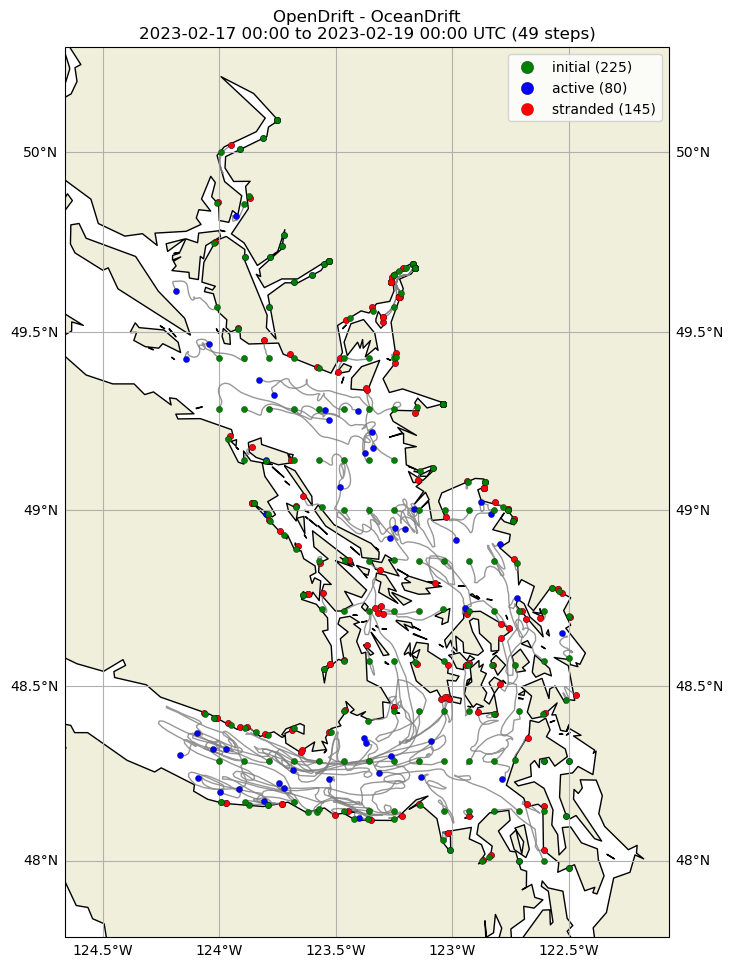

(<GeoAxes: title={'center': 'OpenDrift - OceanDrift\n2023-02-17 00:00 to 2023-02-19 00:00 UTC (49 steps)'}>,
 <Figure size 744.163x1100 with 1 Axes>)

In [13]:
o3.plot()